### Método 1

In [7]:
# testing timeit()
import time

start = time.time()
def bubble_sort(arr):

    # Outer loop to iterate through the list n times
    for n in range(len(arr) - 1, 0, -1):

        # Inner loop to compare adjacent elements
        for i in range(n):
            if arr[i] > arr[i + 1]:

                # Swap elements if they are in the wrong order
                swapped = True
                arr[i], arr[i + 1] = arr[i + 1], arr[i]


# Sample list to be sorted
arr = [39, 12, 18, 85, 72, 10, 2, 18]
print("Unsorted list is:")
print(arr)
bubble_sort(arr)

print(time.time() - start)

Unsorted list is:
[39, 12, 18, 85, 72, 10, 2, 18]
0.0009984970092773438


### Método 2

In [5]:
from datetime import datetime
 
# record current timestamp
start = datetime.now()
 
def bubble_sort(arr):

    # Outer loop to iterate through the list n times
    for n in range(len(arr) - 1, 0, -1):

        # Inner loop to compare adjacent elements
        for i in range(n):
            if arr[i] > arr[i + 1]:

                # Swap elements if they are in the wrong order
                swapped = True
                arr[i], arr[i + 1] = arr[i + 1], arr[i]


# Sample list to be sorted
arr = [39, 12, 18, 85, 72, 10, 2, 18]

bubble_sort(arr)
end = datetime.now()
 
# find difference loop start and end time and display
td = (end - start).total_seconds() * 10**3
print(f"The time of execution of above program is : {td:.03f}ms")

The time of execution of above program is : 1.022ms


### Método 3

In [9]:
import timeit
 
# code snippet to be executed only once
# before the stmt parameter in timeit
mysetup = "from math import sqrt"
 
# code snippet whose execution time
# is to be measured
mycode = '''
def bubble_sort(arr):

    # Outer loop to iterate through the list n times
    for n in range(len(arr) - 1, 0, -1):

        # Inner loop to compare adjacent elements
        for i in range(n):
            if arr[i] > arr[i + 1]:

                # Swap elements if they are in the wrong order
                swapped = True
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
'''
 
# timeit statement
exec_time = timeit.timeit(stmt=mycode,
                          setup=mysetup,
                          number=1000000) * 10**3
print(f"The time of execution of above program is : {exec_time:.03f}ms")

The time of execution of above program is : 137.389ms


### Método 4

In [6]:
# SuperFastPython.com
# example of timing a statement with time.process_time()
from time import process_time
# record start time
time_start = process_time()
# execute the statement
data = [i*i for i in range(1000)]
# record end time
time_end = process_time()
# calculate the duration
time_duration = time_end - time_start
# report the duration
print(f'Took {time_duration} seconds')

Took 1.703125 seconds


# Implementação

#### Bibliotecas a serem importadas

In [1]:
from timeit import repeat # utilizada para o cálculo do tempo
import random
from random import seed, randint # utilizada para auxiliar na geração aleatória de números
import statistics # utilizada para auxiliar no calculo da média de tempo
import numpy as np # utilizada para auziliar em operações na plotagem dos gráficos
import matplotlib.pyplot as plt # utilizada para plotar os gráficos
from matplotlib.ticker import FormatStrFormatter # utilizada para auxiliar na plotagem dos gráficos

#### Algoritmos de Ordenação

BubbleSort

In [2]:
# ALGORITMOS DE ORDENAÇÃO
def bubbleSort(array, tam):
    # loop through each element of array
    for i in range(tam):
        # keep track of swapping
        swapped = False
        # loop to compare array elements
        for j in range(0, tam - i - 1):
            # compare two adjacent elements
            # change > to < to sort in descending order
            if array[j] > array[j + 1]:
                # swapping occurs if elements
                # are not in the intended order
                temp = array[j]
                array[j] = array[j+1]
                array[j+1] = temp

                swapped = True
        # no swapping means the array is already sorted
        # so no need for further comparison
        if not swapped:
            break

    return array

CountingSort

In [3]:
# ALGORITMOS DE ORDENAÇÃO
#algoritmo countingSort
def countingSort(array, tam):
    output = [0] * tam
    # Initialize count array
    count = [0] * (max(array) + 1)
    # Store the count of each elements in count array
    for i in range(0, tam):
        count[array[i]] += 1
    # Store the cummulative count
    for i in range(1, (max(array) + 1)):
        count[i] += count[i - 1]
    # Find the index of each element of the original array in count array
    # place the elements in output array
    i = tam - 1
    while i >= 0:
        output[count[array[i]] - 1] = array[i]
        count[array[i]] -= 1
        i -= 1
    # Copy the sorted elements into original array
    for i in range(0, tam):
        array[i] = output[i]
    
    return array

RadixSort

In [4]:
# ALGORITMOS DE ORDENAÇÃO
#algoritmo radixSort com auxílio do algoritmo countingSort
# Using counting sort to sort the elements in the basis of significant places
def countingSortaux(array, place, tam):
    output = [0] * tam
    count = [0] * 10
    # Calculate count of elements
    for i in range(0, tam):
        index = array[i] // place
        count[index % 10] += 1
    # Calculate cumulative count
    for i in range(1, 10):
        count[i] += count[i - 1]
    # Place the elements in sorted order
    i = tam - 1
    while i >= 0:
        index = array[i] // place
        output[count[index % 10] - 1] = array[i]
        count[index % 10] -= 1
        i -= 1
    for i in range(0, tam):
        array[i] = output[i]

# Main function to implement radix sort
def radixSort(array, tam):
    # Get maximum element
    max_element = max(array)
    # Apply counting sort to sort elements based on place value.
    place = 1
    while max_element // place > 0:
        countingSortaux(array, place, tam)
        place *= 10
    
    return array

HeapSort

In [5]:
#algoritmo heapSort
def heapify(arr, n, i):
    # Find largest among root and children
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[i] < arr[l]:
        largest = l

    if r < n and arr[largest] < arr[r]:
        largest = r

    # If root is not largest, swap with largest and continue heapifying
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heapSort(arr, tam):
    # Build max heap
    for i in range(tam//2, -1, -1):
        heapify(arr, tam, i)

    for i in range(tam-1, 0, -1):
        # Swap
        arr[i], arr[0] = arr[0], arr[i]

        # Heapify root element
        heapify(arr, i, 0)

    return arr

ShellSort

In [6]:
#algoritmo shellSort
def shellSort(array, n):
    # Rearrange elements at each n/2, n/4, n/8, ... intervals
    interval = n // 2
    while interval > 0:
        for i in range(interval, n):
            temp = array[i]
            j = i
            while j >= interval and array[j - interval] > temp:
                array[j] = array[j - interval]
                j -= interval

            array[j] = temp
        interval //= 2
    return array

MergeSort

In [7]:
#algoritmo mergeSort
def mergeSort(array, tam):
    if tam > 1:
        #  r is the point where the array is divided into two subarrays
        r = tam//2
        L = array[:r]
        M = array[r:]
        # Sort the two halves
        mergeSort(L, r)
        mergeSort(M, r)
        i = j = k = 0
        # Until we reach either end of either L or M, pick larger among
        # elements L and M and place them in the correct position at A[p..r]
        while i < len(L) and j < len(M):
            if L[i] < M[j]:
                array[k] = L[i]
                i += 1
            else:
                array[k] = M[j]
                j += 1
            k += 1
        # When we run out of elements in either L or M,
        # pick up the remaining elements and put in A[p..r]
        while i < len(L):
            array[k] = L[i]
            i += 1
            k += 1

        while j < len(M):
            array[k] = M[j]
            j += 1
            k += 1
    return array

SelectionSort

In [8]:
#algoritmo selectionSort
def selectionSort(array, size):
    for step in range(size):
        min_idx = step
        for i in range(step + 1, size):
            # to sort in descending order, change > to < in this line
            # select the minimum element in each loop
            if array[i] < array[min_idx]:
                min_idx = i
        # put min at the correct position
        (array[step], array[min_idx]) = (array[min_idx], array[step])
    return array

InsertionSort

In [9]:
def insertionSort(arr,n):
    if n <= 1:
        return 

    for i in range(1, n): 
        key = arr[i] 
        j = i-1
        while j >= 0 and key < arr[j]: 
            arr[j+1] = arr[j] 
            j -= 1
        arr[j+1] = key 
    
    return arr


QuickSort

In [10]:
def quickSort(alist, tam):
   quickSortHelper(alist,0,tam-1)

def quickSortHelper(alist,first,last):
   if first<last:

       splitpoint = partition(alist,first,last)

       quickSortHelper(alist,first,splitpoint-1)
       quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
   pivotvalue = alist[first]

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark

BucketSort

In [11]:
def insertion_sort(bucket):
    for i in range(1, len(bucket)):
        key = bucket[i]
        j = i - 1
        while j >= 0 and bucket[j] > key:
            bucket[j + 1] = bucket[j]
            j -= 1
        bucket[j + 1] = key

def bucketSort(arr,n):
    buckets = [[] for _ in range(n)]

    # Put array elements in different buckets
    for num in arr:
        bi = int(n * num)
        buckets[bi].append(num)

    # Sort individual buckets using insertion sort
    for bucket in buckets:
        insertion_sort(bucket)

    # Concatenate all buckets into arr[]
    index = 0
    for bucket in buckets:
        for num in bucket:
            arr[index] = num
            index += 1
    
    return arr

#### Funções auxiliares - geração de listas aleatórias, ordenadas e inversamente ordenadas

In [12]:
# GERADOR DE INTEIROS ALEATÓRIOS
def random_generate(n):
    array = []
    seed(randint(0, n))  # Gera uma seed aleatória
    for _ in range(n):
        value = randint(0, n)
        array.append(value)
    return array

# GERADOR EM ORDEM
def order_generate(n):
    return list(range(n))

# GERADOR EM INVERSO
def inverse_order_generate(n):
    return list(range(n - 1, -1, -1))

# GERA VALORES EM UM INTERVALO
def random_generate_interval(n):
    array = []
    seed(randint(0, n))  # Gera uma seed aleatória
    for _ in range(n):
        value = random.uniform(0,1)
        array.append(value)
    return array


# GERADOR EM
def order_generate_interval(n):
    return list(np.arange(0,1,(1/n)))


# GERADOR EM INVERSO
def inverse_order_generate_interval(n):
    t = list(np.arange(0, 1,(1/n)))
    return t[::-1]


# Tamanhos do array
ARRAY_LENGTH_1 = 10
ARRAY_LENGTH_2 = 100
ARRAY_LENGTH_3 = 1000
ARRAY_LENGTH_4 = 10000
ARRAY_LENGTH_5 = 100000
ARRAY_LENGTH_6 = 1000000
INTERVALO_PLOTAGEM = 80

# Arrays auxiliares para plotagem dos gráficos
ARRAY_PLOT_X = [10,100,1000,10000,100000,1000000]

#### Funções auxiliares - Plotagem do gráfico

In [13]:
def constroiGrafico(x,y, intervalo):

    xi = list(range(len(x)))
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.spines['bottom'].set_visible(False)
    plt.plot(xi, y,marker=".", linestyle='-', color='r', label='tempo das entradas testadas') 
    plt.xlabel('Tamanho do vetor de entrada')
    plt.ylabel('Tempo Médio de Execução(segundos)') 
    plt.title('Relação entre entrada e Tempo de consumo de ordenação')
    ax.set_ylim(0, y[5]+intervalo)
    ax.set_yticks(np.arange(y[0],y[5], intervalo))
    plt.xticks(xi, x)
    
    ax.grid(True)

#### Funções auxiliares - Plotagem de múltiplos gráficos

In [14]:
def constroiGraficoCompara(y1,y2,y3,intervalo):
    x = [10,100,1000,10000,100000,1000000]
    
    fig, ax = plt.subplots(figsize=(8,8))
    
    # legendas e apresentação
    plt.xlabel('Tamanho do vetor de entrada')
    plt.ylabel('Tempo Médio de Execução(segundos)') 
    plt.title('Relação entre entrada e Tempo de consumo de ordenação')
    ax.spines['bottom'].set_visible(False)
    ax.grid(True) 
    
    #definir limites do gráfico de comparação
    maior = max(y1[5],y2[5],y3[5])
    menor = min(y1[0],y2[0],y3[0])
    
    #x
    xi = list(range(len(x)))
    plt.xticks(xi, x)
    
    #y
    ax.set_ylim(menor, maior)
    ax.set_yticks(np.arange(menor,maior+intervalo, intervalo))
    
    #plotar y1 : elementos aleatórios
    plt.plot(xi, y1,marker="^", linestyle='-', color='r', label='tempo das entradas testadas')
    
    #plotar y2 : elementos ordenados
    plt.plot(xi, y2,marker="o", linestyle='-', color='b', label='tempo das entradas testadas')
    
    #plotar y3 : elementos inversamente ordenados
    plt.plot(xi, y3,marker="v", linestyle='-', color='g', label='tempo das entradas testadas')
    
    plt.legend(['Elementos Aleatórios','Elementos Ordenados','Elementos Inversamente Ordenados'])
    plt.show()

#### Função de análise de tempo

In [15]:
# ANALISE DOS TEMPOS DE ALGORITMOS
def run_sorting_algorithm(algorithm, n, aux_generate):
    
    # Importa o algoritmo da main e as funções auxiliares de geração
    setup_code = f"from __main__ import {algorithm}, {aux_generate} \n" \
                 f"array = {aux_generate}({n}) \n"

    # Define o parâmetro stmt
    stmt = f"{algorithm}(array,{n})"

    # utiliza a biblioteca timeit para medir o tempo
    #setup : codigo carregado antes d função, importa bibliotecas e prepara o ambiente para a execução da função
    # stmt : chama a função que será executada e seus parametros
    # repeat: corresponde a REPETIÇÃO DO EXPERIMENTO COMPLETO - REPETE O SETUP TAMBÉM
    # number : corresponde ao NÚMERO DE REPETIÇÕES DO STMT (SOMENTE) em cada repetição
    times = repeat(setup=setup_code, stmt=stmt, repeat=3, number=3)
    
    # Imprime os tempos de execução
    print(f"Algoritmos: {algorithm}. Tempos de execução: {(times)}. Média das execuções: {statistics.mean(times)}")
    return statistics.mean(times)
        

## BubbleSort

### Cáculo do Tempo do Bubblesort - Array de elementos aleatórios

In [47]:
# Chamada para o bubblesort com 10 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_1, aux_generate="random_generate")

Algoritmos: bubbleSort. Tempos de execução: [1.5700003132224083e-05, 1.2500007869675756e-05, 1.1600001016631722e-05]. Média das execuções: 1.3266670672843853e-05


1.3266670672843853e-05

In [49]:
# Chamada para o bubblesort com 100 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_2, aux_generate="random_generate")

Algoritmos: bubbleSort. Tempos de execução: [0.00028559999191202223, 0.0005620000010821968, 0.0002935999946203083]. Média das execuções: 0.00038039999587150913


0.00038039999587150913

In [51]:
# Chamada para o bubblesort com 1000 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_3, aux_generate="random_generate")

Algoritmos: bubbleSort. Tempos de execução: [0.05947609999566339, 0.07002879999345168, 0.07464289999916218]. Média das execuções: 0.06804926666275908


0.06804926666275908

In [59]:
# Chamada para o bubblesort com 10000 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_4, aux_generate="random_generate")

Algoritmos: bubbleSort. Tempos de execução: [7.284434400004102, 7.852122500014957, 7.801143799995771]. Média das execuções: 7.645900233338277


7.645900233338277

In [ ]:
# Chamada para o bubblesort com 100000 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_5, aux_generate="random_generate")

Algoritmos: bubbleSort. Tempos de execução: [545.9214892999735, 678.4163112000097, 633.383660200052]. Média das execuções: 619.2404869000117

In [ ]:
# Chamada para o bubblesort com 1000000 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_6, aux_generate="random_generate")

Algoritmos: bubbleSort. Estimativa de tempo de execução: 68000 segundos, ou 18.89 horas

### Plotagem do gráfico do Bubblesort - Array de elementos aleatórios 

A partir das médias, obtem-se o gráfico através do seguinte código:

A partir dos resultados obtidos, utilizaremos a função auxiliar de plotagem de gráficos para observar o comportamento do Bubblesort em função do tamanho da entrada

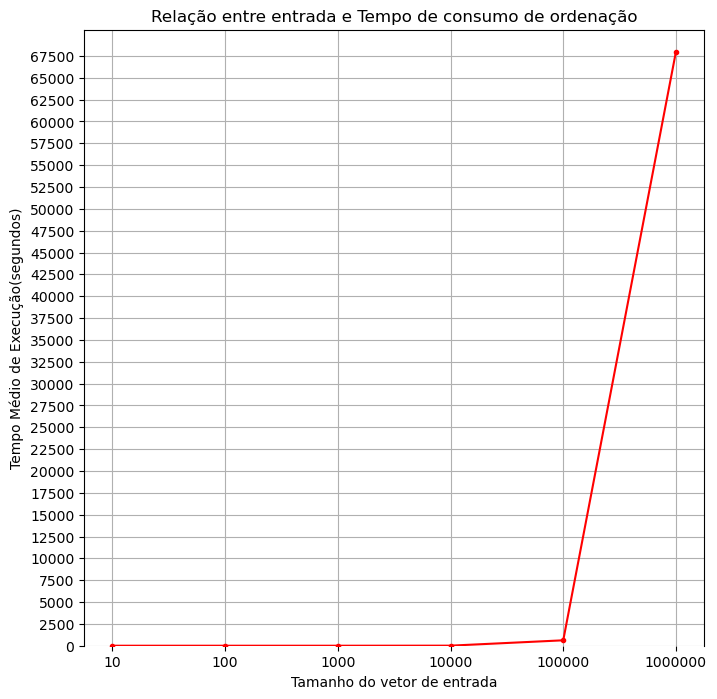

In [16]:
ARRAY_BS_RG=[]
ARRAY_BS_RG.append(1.3266670672843853e-05) # adiciona ao vetor o valor da média de tempo para 10 elementos
ARRAY_BS_RG.append(0.00038039999587150913) # adiciona ao vetor o valor da média de tempo para 100 elementos
ARRAY_BS_RG.append(0.06804926666275908) # adiciona ao vetor o valor da média de tempo para 1000 elementos
ARRAY_BS_RG.append(7.645900233338277) # adiciona ao vetor o valor da média de tempo para 10000 elementos
ARRAY_BS_RG.append(619.2404869000117) # adiciona ao vetor o valor da média de tempo para 100000 elementos
ARRAY_BS_RG.append(68000) # adiciona ao vetor o valor da média de tempo para 1000000 elementos
INTERVALO_PLOTAGEM = 2500

constroiGrafico(ARRAY_PLOT_X,ARRAY_BS_RG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do Bubblesort - Array de elementos ordenados

In [62]:
# Chamada para o bubblesort com 10 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_1, aux_generate="order_generate")

Algoritmos: bubbleSort. Tempos de execução: [3.9000005926936865e-06, 2.1999876480549574e-06, 2.0999868866056204e-06]. Média das execuções: 2.7333250424514213e-06


2.7333250424514213e-06

In [64]:
# Chamada para o bubblesort com 100 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_2, aux_generate="order_generate")

Algoritmos: bubbleSort. Tempos de execução: [1.8399994587525725e-05, 1.6400008462369442e-05, 1.5700003132224083e-05]. Média das execuções: 1.683333539403975e-05


1.683333539403975e-05

In [66]:
# Chamada para o bubblesort com 1000 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_3, aux_generate="order_generate")

Algoritmos: bubbleSort. Tempos de execução: [0.00021580001339316368, 0.00015010000788606703, 0.00016219998360611498]. Média das execuções: 0.0001760333349617819


0.0001760333349617819

In [68]:
# Chamada para o bubblesort com 10000 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_4, aux_generate="order_generate")

Algoritmos: bubbleSort. Tempos de execução: [0.003661199996713549, 0.0020323999924585223, 0.00274389999685809]. Média das execuções: 0.002812499995343387


0.002812499995343387

In [70]:
# Chamada para o bubblesort com 100000 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_5, aux_generate="order_generate")

Algoritmos: bubbleSort. Tempos de execução: [0.03275700000813231, 0.02055139999720268, 0.019862099987221882]. Média das execuções: 0.024390166664185624


0.024390166664185624

In [72]:
# Chamada para o bubblesort com 1000000 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_6, aux_generate="order_generate")

Algoritmos: bubbleSort. Tempos de execução: [0.30749780000769533, 0.3221120999951381, 0.23818860002211295]. Média das execuções: 0.2892661666749821


0.2892661666749821

### Plotagem do gráfico do Bubblesort - Array de elementos ordenados 

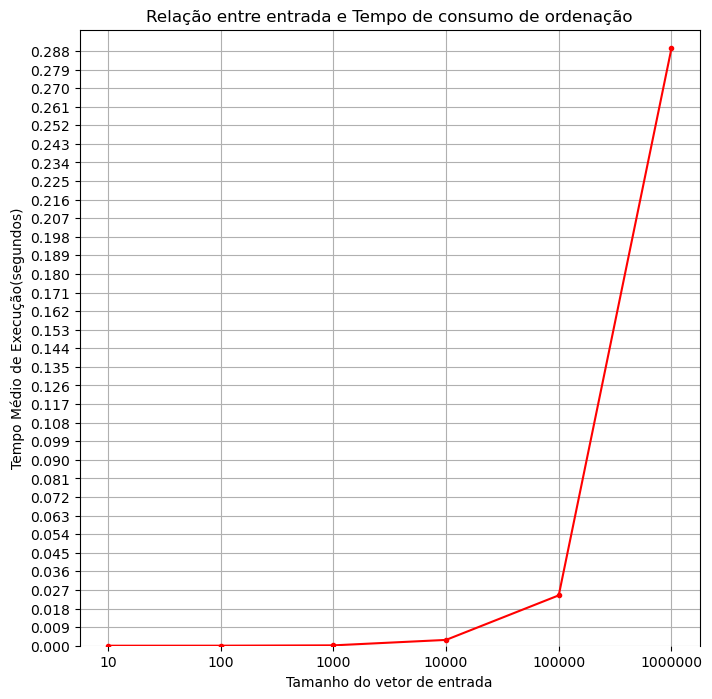

In [19]:
ARRAY_BS_OG=[]
ARRAY_BS_OG.append(2.7333250424514213e-06) # adiciona ao vetor o valor da média de tempo para 10 elementos
ARRAY_BS_OG.append(1.683333539403975e-05) # adiciona ao vetor o valor da média de tempo para 100 elementos
ARRAY_BS_OG.append(0.0001760333349617819) # adiciona ao vetor o valor da média de tempo para 1000 elementos
ARRAY_BS_OG.append(0.002812499995343387) # adiciona ao vetor o valor da média de tempo para 10000 elementos
ARRAY_BS_OG.append(0.024390166664185624) # adiciona ao vetor o valor da média de tempo para 100000 elementos
ARRAY_BS_OG.append(0.2892661666749821) # adiciona ao vetor o valor da média de tempo para 1000000 elementos
INTERVALO_PLOTAGEM = 0.009

constroiGrafico(ARRAY_PLOT_X,ARRAY_BS_OG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do Bubblesort - Array de elementos inversamente ordenados

In [74]:
# Chamada para o bubblesort com 10 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_1, aux_generate="inverse_order_generate")

Algoritmos: bubbleSort. Tempos de execução: [2.6399997295811772e-05, 1.7799990018829703e-05, 1.759998849593103e-05]. Média das execuções: 2.0599991936857503e-05


2.0599991936857503e-05

In [76]:
# Chamada para o bubblesort com 100 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_2, aux_generate="inverse_order_generate")

Algoritmos: bubbleSort. Tempos de execução: [0.0006926000060047954, 0.0007249000191222876, 0.0007971000159159303]. Média das execuções: 0.0007382000136810044


0.0007382000136810044

In [78]:
# Chamada para o bubblesort com 1000 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_3, aux_generate="inverse_order_generate")

Algoritmos: bubbleSort. Tempos de execução: [0.07777229999192059, 0.09252659999765456, 0.08499239999218844]. Média das execuções: 0.08509709999392119


0.08509709999392119

In [80]:
# Chamada para o bubblesort com 10000 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_4, aux_generate="inverse_order_generate")

Algoritmos: bubbleSort. Tempos de execução: [10.153069299994968, 10.214210800011642, 10.340600199997425]. Média das execuções: 10.235960100001344


10.235960100001344

In [ ]:
# Chamada para o bubblesort com 100000 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_5, aux_generate="inverse_order_generate")

Algoritmos: bubbleSort. Tempos de execução: [962.0481970999972, 939.2735897999955, 910.5796244000085]. Média das execuções: 937.3004704333338

In [ ]:
# Chamada para o bubblesort com 1000000 elementos 
run_sorting_algorithm(algorithm="bubbleSort", n=ARRAY_LENGTH_6, aux_generate="inverse_order_generate")

Algoritmos: bubbleSort. Estimativa de tempo de execução: 102400 segundos, ou 28.44 horas

### Plotagem do gráfico do Bubblesort - Array de elementos inversamente ordenados 

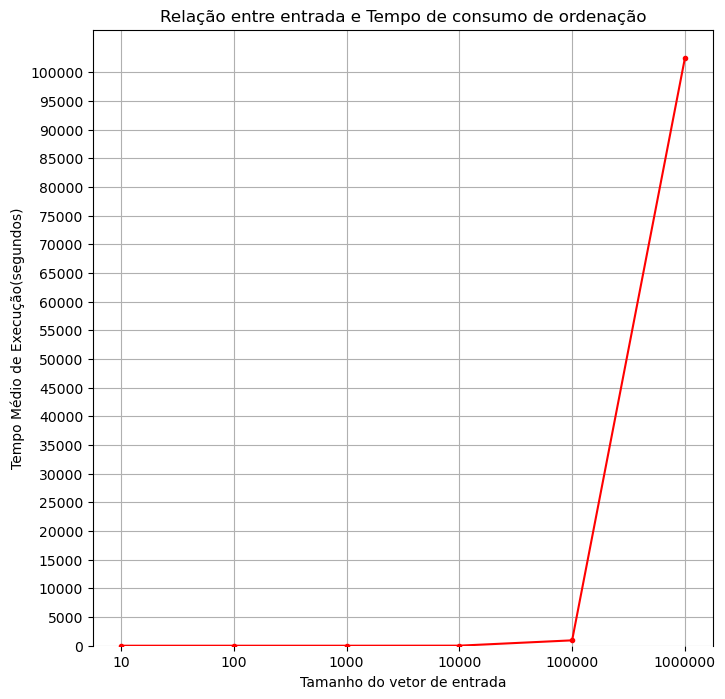

In [20]:
ARRAY_BS_IG=[]
ARRAY_BS_IG.append(2.0599991936857503e-05) # adiciona ao vetor o valor da média de tempo para 10 elementos
ARRAY_BS_IG.append(0.0007382000136810044) # adiciona ao vetor o valor da média de tempo para 100 elementos
ARRAY_BS_IG.append(0.08509709999392119) # adiciona ao vetor o valor da média de tempo para 1000 elementos
ARRAY_BS_IG.append(10.235960100001344) # adiciona ao vetor o valor da média de tempo para 10000 elementos
ARRAY_BS_IG.append(937.3004704333338) # adiciona ao vetor o valor da média de tempo para 100000 elementos
ARRAY_BS_IG.append(102400) # adiciona ao vetor o valor da média de tempo para 1000000 elementos
INTERVALO_PLOTAGEM = 5000

constroiGrafico(ARRAY_PLOT_X,ARRAY_BS_IG,INTERVALO_PLOTAGEM)

### Plotagem comparativa dos Gráficos - BubbleSort

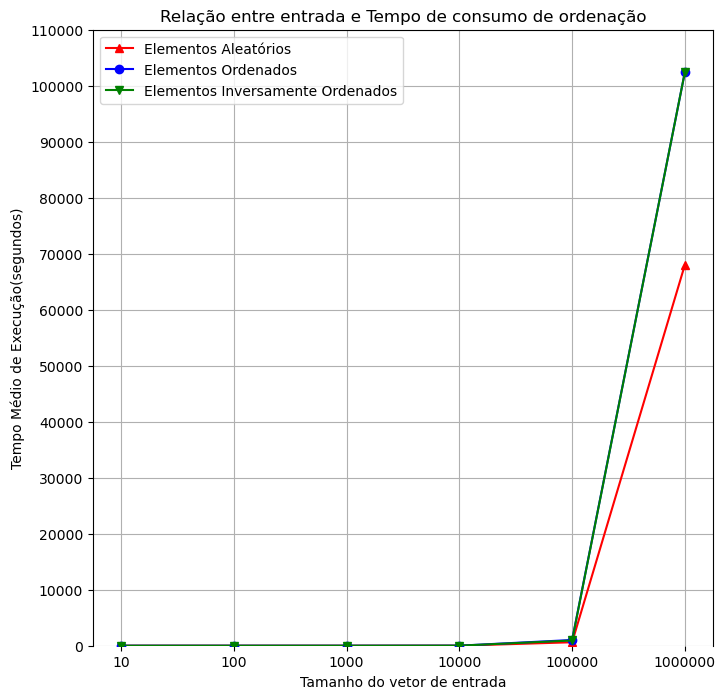

In [98]:
INTERVALO_PLOTAGEM = 10000
constroiGraficoCompara(ARRAY_BS_RG,ARRAY_BS_OG,ARRAY_BS_IG, INTERVALO_PLOTAGEM)

## CountingSort

### Cáculo do Tempo do CountingSort - Array de elementos aleatórios

In [32]:
# Chamada para o countingSort com 10 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_1, aux_generate="random_generate")

Algoritmos: countingSort. Tempos de execução: [3.130000550299883e-05, 9.200070053339005e-06, 8.899951353669167e-06]. Média das execuções: 1.6466675636669e-05


In [35]:
# Chamada para o countingSort com 100 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_2, aux_generate="random_generate")

Algoritmos: countingSort. Tempos de execução: [0.00025809998624026775, 0.00026570004411041737, 0.0002676999429240823]. Média das execuções: 0.00026383332442492247


In [37]:
# Chamada para o countingSort com 1000 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_3, aux_generate="random_generate")

Algoritmos: countingSort. Tempos de execução: [0.0020843000384047627, 0.0023033999605104327, 0.0022401000605896115]. Média das execuções: 0.002209266686501602


In [39]:
# Chamada para o countingSort com 10000 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_4, aux_generate="random_generate")

Algoritmos: countingSort. Tempos de execução: [0.018858400057069957, 0.017509099910967052, 0.012508100015111268]. Média das execuções: 0.016291866661049426


In [41]:
# Chamada para o countingSort com 100000 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_5, aux_generate="random_generate")

Algoritmos: countingSort. Tempos de execução: [0.282178399967961, 0.16934959997888654, 0.16991489997599274]. Média das execuções: 0.20714763330761343


In [43]:
# Chamada para o countingSort com 1000000 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_6, aux_generate="random_generate")

Algoritmos: countingSort. Tempos de execução: [2.9972246000543237, 3.2226205999031663, 3.0890152000356466]. Média das execuções: 3.102953466664379


### Plotagem do gráfico do CountingSort - Array de elementos aleatórios

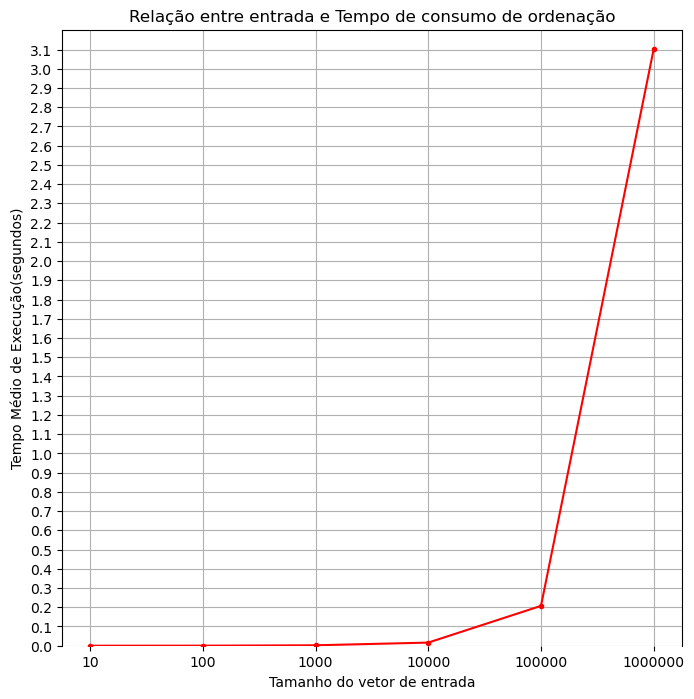

In [21]:
ARRAY_CS_RG = []
ARRAY_CS_RG.append(1.6466675636669e-05) # adiciona ao vetor o valor da média de tempo para 10 elementos
ARRAY_CS_RG.append(0.00026383332442492247) # adiciona ao vetor o valor da média de tempo para 100 elementos
ARRAY_CS_RG.append(0.002209266686501602) # adiciona ao vetor o valor da média de tempo para 1000 elementos
ARRAY_CS_RG.append(0.016291866661049426) # adiciona ao vetor o valor da média de tempo para 10000 elementos
ARRAY_CS_RG.append(0.2071476333076134) # adiciona ao vetor o valor da média de tempo para 100000 elementos
ARRAY_CS_RG.append(3.102953466664379) # adiciona ao vetor o valor da média de tempo para 1000000 elementos
INTERVALO_PLOTAGEM = 0.1

constroiGrafico(ARRAY_PLOT_X,ARRAY_CS_RG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do CountingSort - Array de elementos ordenados

In [49]:
# Chamada para o countingSort com 10 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_1, aux_generate="order_generate")

Algoritmos: countingSort. Tempos de execução: [1.7000013031065464e-05, 4.0400074794888496e-05, 3.130000550299883e-05]. Média das execuções: 2.9566697776317596e-05


In [51]:
# Chamada para o countingSort com 100 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_2, aux_generate="order_generate")

Algoritmos: countingSort. Tempos de execução: [0.0001686000032350421, 0.00016719999257475138, 0.00015730003360658884]. Média das execuções: 0.00016436667647212744


In [53]:
# Chamada para o countingSort com 1000 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_3, aux_generate="order_generate")

Algoritmos: countingSort. Tempos de execução: [0.0010386999929323792, 0.0008842999814078212, 0.0014685000060126185]. Média das execuções: 0.0011304999934509397


In [55]:
# Chamada para o countingSort com 10000 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_4, aux_generate="order_generate")

Algoritmos: countingSort. Tempos de execução: [0.015981000033207238, 0.01194599992595613, 0.010417600045911968]. Média das execuções: 0.012781533335025111


In [57]:
# Chamada para o countingSort com 100000 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_5, aux_generate="order_generate")

Algoritmos: countingSort. Tempos de execução: [0.14208150003105402, 0.15928270004224032, 0.14483989996369928]. Média das execuções: 0.14873470001233122


In [59]:
# Chamada para o countingSort com 1000000 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_6, aux_generate="order_generate")

Algoritmos: countingSort. Tempos de execução: [1.4563803999917582, 1.6065851000603288, 1.5340154999867082]. Média das execuções: 1.5323270000129317


### Plotagem do gráfico do CountingSort - Array de elementos ordenados

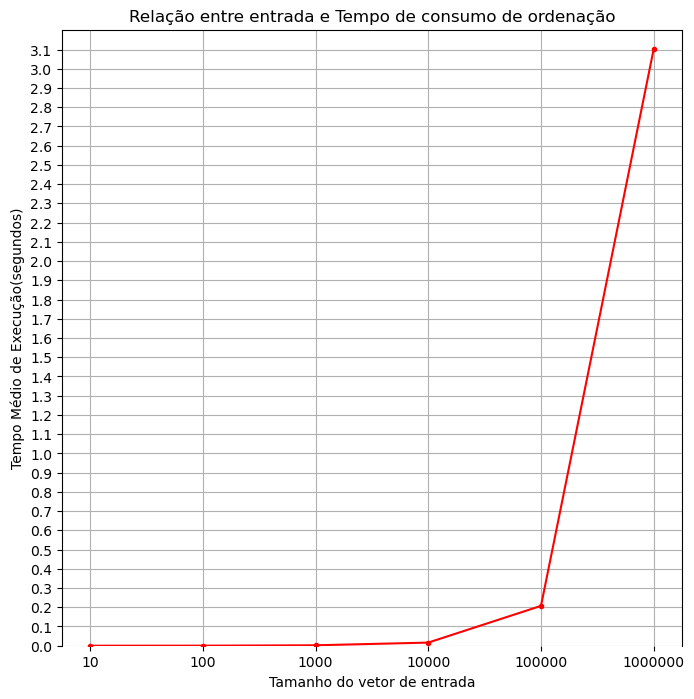

In [22]:
ARRAY_CS_OG = []
ARRAY_CS_OG.append(2.9566697776317596e-05) # adiciona ao vetor o valor da média de tempo para 10 elementos
ARRAY_CS_OG.append(0.00016436667647212744) # adiciona ao vetor o valor da média de tempo para 100 elementos
ARRAY_CS_OG.append(0.0011304999934509397) # adiciona ao vetor o valor da média de tempo para 1000 elementos
ARRAY_CS_OG.append(0.012781533335025111) # adiciona ao vetor o valor da média de tempo para 10000 elementos
ARRAY_CS_OG.append(0.14873470001233122) # adiciona ao vetor o valor da média de tempo para 100000 elementos
ARRAY_CS_OG.append(1.5323270000129317) # adiciona ao vetor o valor da média de tempo para 1000000 elementos
INTERVALO_PLOTAGEM = 0.1

constroiGrafico(ARRAY_PLOT_X,ARRAY_CS_RG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do CountingSort - Array de elementos inversamente ordenados

In [61]:
# Chamada para o countingSort com 10 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_1, aux_generate="inverse_order_generate")

Algoritmos: countingSort. Tempos de execução: [3.160000778734684e-05, 2.2500054910779e-05, 2.259993925690651e-05]. Média das execuções: 2.5566667318344116e-05


In [63]:
# Chamada para o countingSort com 100 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_2, aux_generate="inverse_order_generate")

Algoritmos: countingSort. Tempos de execução: [0.00016000005416572094, 0.00014739995822310448, 0.0001466000685468316]. Média das execuções: 0.00015133336031188568


In [65]:
# Chamada para o countingSort com 1000 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_3, aux_generate="inverse_order_generate")

Algoritmos: countingSort. Tempos de execução: [0.0021215999731794, 0.0019417000003159046, 0.001969299977645278]. Média das execuções: 0.002010866650380194


In [67]:
# Chamada para o countingSort com 10000 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_4, aux_generate="inverse_order_generate")

Algoritmos: countingSort. Tempos de execução: [0.020205800072290003, 0.016856799949891865, 0.013920199940912426]. Média das execuções: 0.016994266654364765


In [69]:
# Chamada para o countingSort com 100000 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_5, aux_generate="inverse_order_generate")

Algoritmos: countingSort. Tempos de execução: [0.16834119998384267, 0.19121309998445213, 0.1636211998993531]. Média das execuções: 0.17439183328921595


In [71]:
# Chamada para o countingSort com 1000000 elementos 
run_sorting_algorithm(algorithm="countingSort", n=ARRAY_LENGTH_6, aux_generate="inverse_order_generate")

Algoritmos: countingSort. Tempos de execução: [1.3961837000679225, 1.3372615000698715, 1.3739648000337183]. Média das execuções: 1.3691366667238374


### Plotagem do gráfico do CountingSort - Array de elementos ordenados

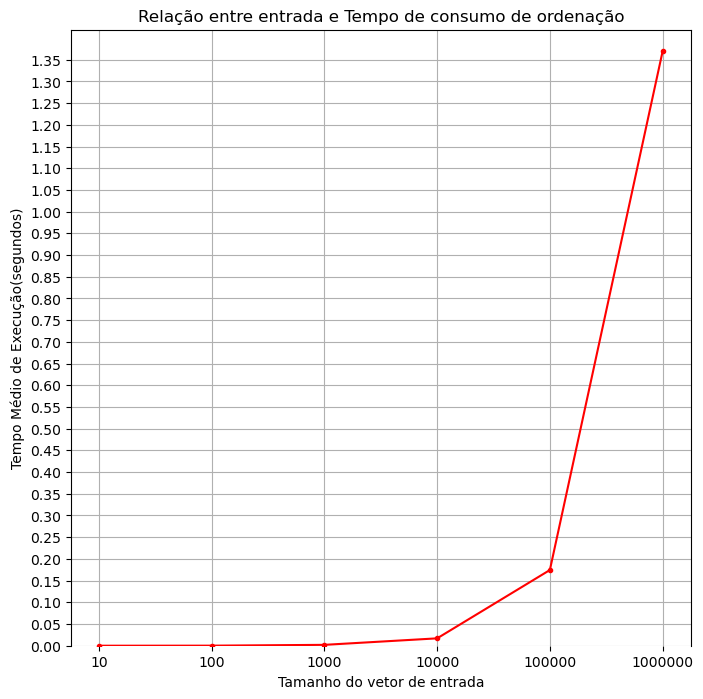

In [23]:
ARRAY_CS_IG = []
ARRAY_CS_IG.append(2.5566667318344116e-05) # adiciona ao vetor o valor da média de tempo para 10 elementos
ARRAY_CS_IG.append(0.00015133336031188568) # adiciona ao vetor o valor da média de tempo para 100 elementos
ARRAY_CS_IG.append(0.002010866650380194) # adiciona ao vetor o valor da média de tempo para 1000 elementos
ARRAY_CS_IG.append(0.016994266654364765) # adiciona ao vetor o valor da média de tempo para 10000 elementos
ARRAY_CS_IG.append(0.17439183328921595) # adiciona ao vetor o valor da média de tempo para 100000 elementos
ARRAY_CS_IG.append(1.3691366667238374) # adiciona ao vetor o valor da média de tempo para 1000000 elementos
INTERVALO_PLOTAGEM = 0.05

constroiGrafico(ARRAY_PLOT_X,ARRAY_CS_IG,INTERVALO_PLOTAGEM)

### Plotagem comparativa dos Gráficos - CountingSort

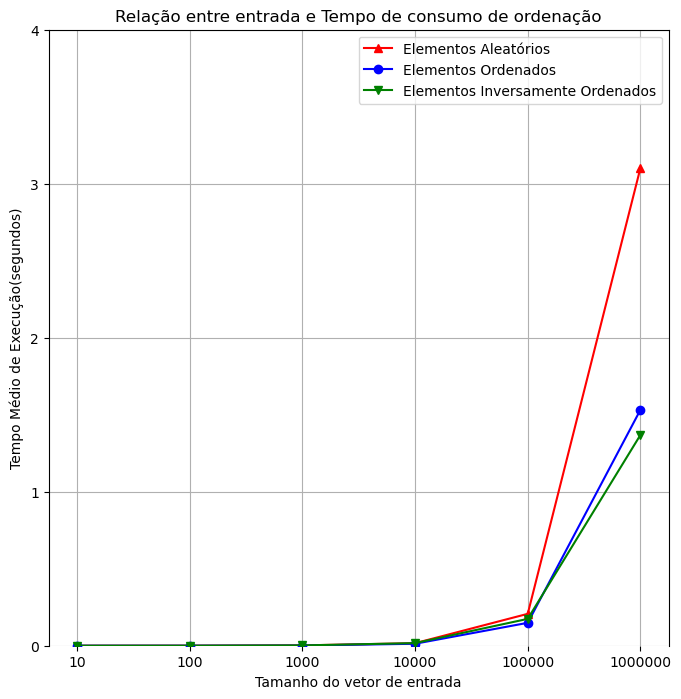

In [237]:
INTERVALO_PLOTAGEM = 1
constroiGraficoCompara(ARRAY_CS_RG,ARRAY_CS_OG,ARRAY_CS_IG, INTERVALO_PLOTAGEM)

## RadixSort

### Cáculo do Tempo do RadixSort - Array de elementos aleatórios

In [80]:
# Chamada para o radixSort com 10 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_1, aux_generate="random_generate")

Algoritmos: radixSort. Tempos de execução: [4.7900015488266945e-05, 2.5999965146183968e-05, 4.569999873638153e-05]. Média das execuções: 3.986665979027748e-05


In [82]:
# Chamada para o radixSort com 100 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_2, aux_generate="random_generate")

Algoritmos: radixSort. Tempos de execução: [0.00051580008585006, 0.0004700000863522291, 0.0005786999827250838]. Média das execuções: 0.0005215000516424576


In [84]:
# Chamada para o radixSort com 1000 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_3, aux_generate="random_generate")

Algoritmos: radixSort. Tempos de execução: [0.0058154999278485775, 0.006098799989558756, 0.0076994000701233745]. Média das execuções: 0.00653789999584357


In [86]:
# Chamada para o radixSort com 10000 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_4, aux_generate="random_generate")

Algoritmos: radixSort. Tempos de execução: [0.08348280005156994, 0.05206599994562566, 0.059435199946165085]. Média das execuções: 0.0649946666477869


In [88]:
# Chamada para o radixSort com 100000 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_5, aux_generate="random_generate")

Algoritmos: radixSort. Tempos de execução: [0.9545486000133678, 0.7638873000396416, 0.7380539999576285]. Média das execuções: 0.8188299666702127


In [90]:
# Chamada para o radixSort com 1000000 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_6, aux_generate="random_generate")

Algoritmos: radixSort. Tempos de execução: [16.494200400076807, 18.42781639995519, 16.43210600002203]. Média das execuções: 17.11804093335134


### Plotagem do gráfico do RadixSort - Array de elementos ordenados

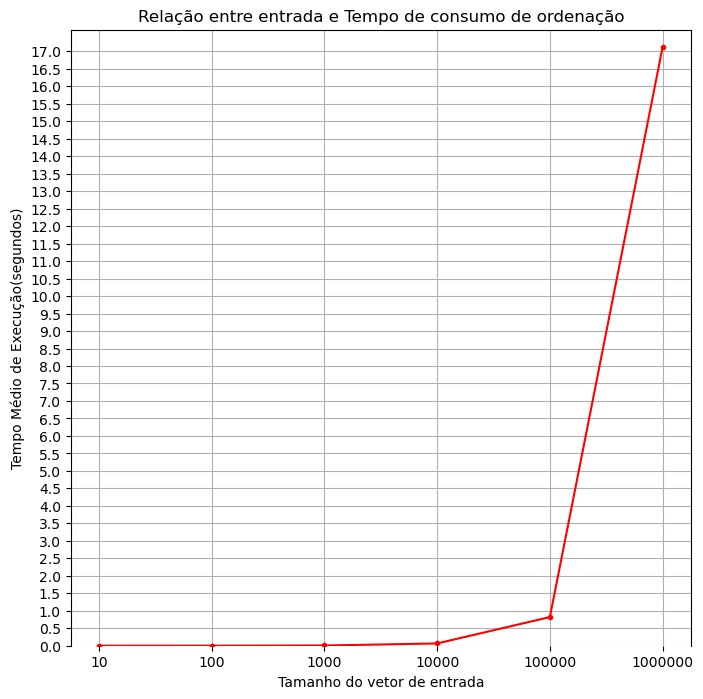

In [24]:
ARRAY_RS_RG = []
ARRAY_RS_RG.append(3.986665979027748e-05) # adiciona ao vetor o valor da média de tempo para 10 elementos
ARRAY_RS_RG.append(0.0005215000516424576) # adiciona ao vetor o valor da média de tempo para 100 elementos
ARRAY_RS_RG.append(0.00653789999584357) # adiciona ao vetor o valor da média de tempo para 1000 elementos
ARRAY_RS_RG.append(0.0649946666477869) # adiciona ao vetor o valor da média de tempo para 10000 elementos
ARRAY_RS_RG.append(0.8188299666702127) # adiciona ao vetor o valor da média de tempo para 100000 elementos
ARRAY_RS_RG.append(17.11804093335134) # adiciona ao vetor o valor da média de tempo para 1000000 elementos
INTERVALO_PLOTAGEM = 0.5

constroiGrafico(ARRAY_PLOT_X,ARRAY_RS_RG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do RadixSort - Array de elementos ordenados

In [92]:
### Cáculo do Tempo do RadixSort - Array de elementos aleatórios# Chamada para o radixSort com 10 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_1, aux_generate="order_generate")

Algoritmos: radixSort. Tempos de execução: [2.9799994081258774e-05, 2.220005262643099e-05, 2.159993164241314e-05]. Média das execuções: 2.4533326116700966e-05


In [94]:
# Chamada para o radixSort com 100 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_2, aux_generate="order_generate")

Algoritmos: radixSort. Tempos de execução: [0.00012890005018562078, 0.0001191999763250351, 0.00011959997937083244]. Média das execuções: 0.00012256666862716278


In [96]:
# Chamada para o radixSort com 1000 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_3, aux_generate="order_generate")

Algoritmos: radixSort. Tempos de execução: [0.00408330000936985, 0.0037323000142350793, 0.0028113999869674444]. Média das execuções: 0.003542333336857458


In [98]:
# Chamada para o radixSort com 10000 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_4, aux_generate="order_generate")

Algoritmos: radixSort. Tempos de execução: [0.07203859998844564, 0.04157200001645833, 0.04034389997832477]. Média das execuções: 0.05131816666107625


In [100]:
# Chamada para o radixSort com 100000 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_5, aux_generate="order_generate")

Algoritmos: radixSort. Tempos de execução: [0.8573491000570357, 0.6750594000332057, 0.5954514000331983]. Média das execuções: 0.70928663337448


In [102]:
# Chamada para o radixSort com 1000000 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_6, aux_generate="order_generate")

Algoritmos: radixSort. Tempos de execução: [9.837543300003745, 9.256599299958907, 9.807494099950418]. Média das execuções: 9.633878899971023


### Plotagem do gráfico do RadixSort - Array de elementos ordenados

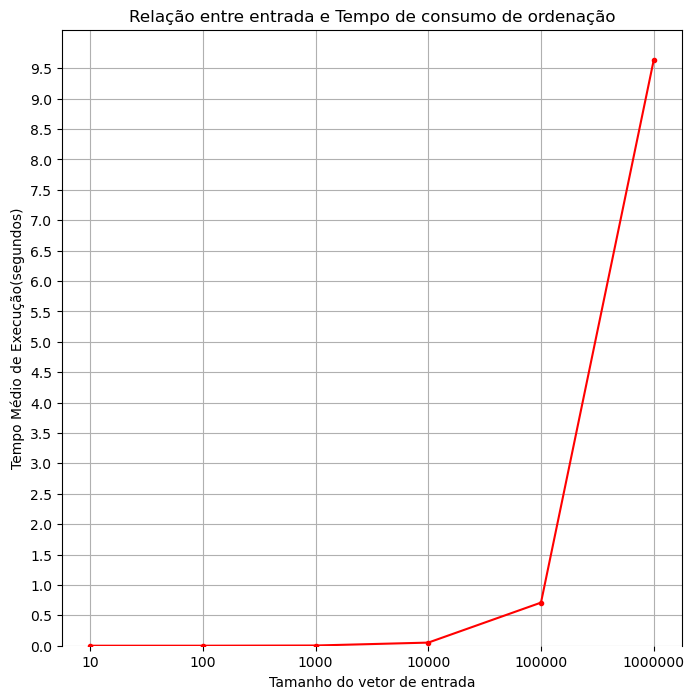

In [25]:
ARRAY_RS_OG = []
ARRAY_RS_OG.append(2.4533326116700966e-05)
ARRAY_RS_OG.append(0.00012256666862716278)
ARRAY_RS_OG.append(0.003542333336857458)
ARRAY_RS_OG.append(0.05131816666107625)
ARRAY_RS_OG.append(0.70928663337448)
ARRAY_RS_OG.append(9.633878899971023)

INTERVALO_PLOTAGEM = 0.5

constroiGrafico(ARRAY_PLOT_X,ARRAY_RS_OG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do RadixSort - Array de elementos inversamente ordenados

In [104]:
# Chamada para o radixSort com 10 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_1, aux_generate="inverse_order_generate")

Algoritmos: radixSort. Tempos de execução: [1.889991108328104e-05, 2.080004196614027e-05, 1.9699917174875736e-05]. Média das execuções: 1.979995674143235e-05


In [114]:
# Chamada para o radixSort com 100 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_2, aux_generate="inverse_order_generate")

Algoritmos: radixSort. Tempos de execução: [0.0002664000494405627, 0.0001452999422326684, 0.00018830003682523966]. Média das execuções: 0.00020000000949949026


In [106]:
# Chamada para o radixSort com 1000 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_3, aux_generate="inverse_order_generate")

Algoritmos: radixSort. Tempos de execução: [0.005898799980059266, 0.004193400032818317, 0.004207500023767352]. Média das execuções: 0.004766566678881645


In [108]:
# Chamada para o radixSort com 10000 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_4, aux_generate="inverse_order_generate")

Algoritmos: radixSort. Tempos de execução: [0.055707500083372, 0.059209899976849556, 0.04072690010070801]. Média das execuções: 0.05188143338697652


In [110]:
# Chamada para o radixSort com 100000 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_5, aux_generate="inverse_order_generate")

Algoritmos: radixSort. Tempos de execução: [0.8310783999040723, 0.8159806999610737, 0.6455582999624312]. Média das execuções: 0.7642057999425257


In [112]:
# Chamada para o radixSort com 1000000 elementos 
run_sorting_algorithm(algorithm="radixSort", n=ARRAY_LENGTH_6, aux_generate="inverse_order_generate")

Algoritmos: radixSort. Tempos de execução: [10.022482499945909, 10.033411799930036, 10.09119439998176]. Média das execuções: 10.049029566619234


### Plotagem do gráfico do RadixSort - Array de elementos inversamente ordenados

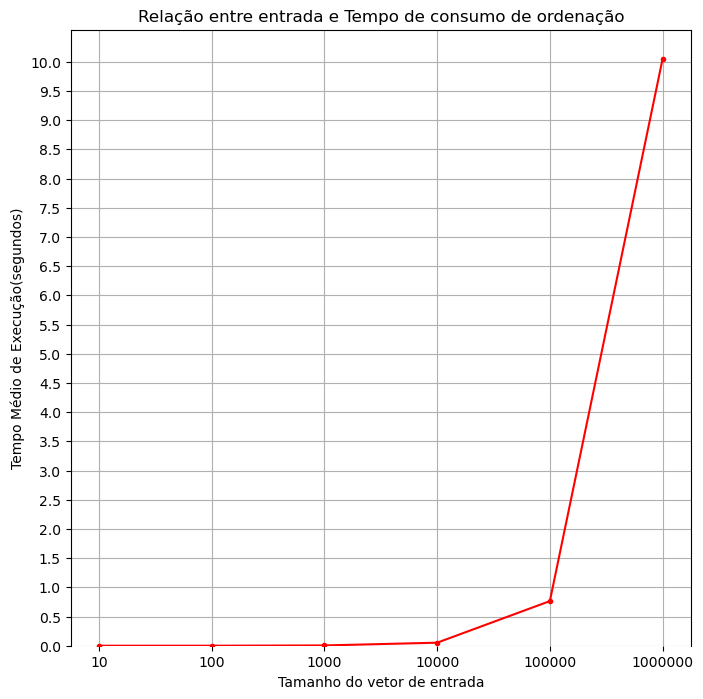

In [26]:
ARRAY_RS_IG = []
ARRAY_RS_IG.append(1.979995674143235e-05)
ARRAY_RS_IG.append(0.00020000000949949026)
ARRAY_RS_IG.append(0.004766566678881645)
ARRAY_RS_IG.append(0.05188143338697652)
ARRAY_RS_IG.append(0.7642057999425257)
ARRAY_RS_IG.append(10.049029566619234)

INTERVALO_PLOTAGEM = 0.5

constroiGrafico(ARRAY_PLOT_X,ARRAY_RS_IG,INTERVALO_PLOTAGEM)

### Plotagem comparativa dos Gráficos - RadixSort

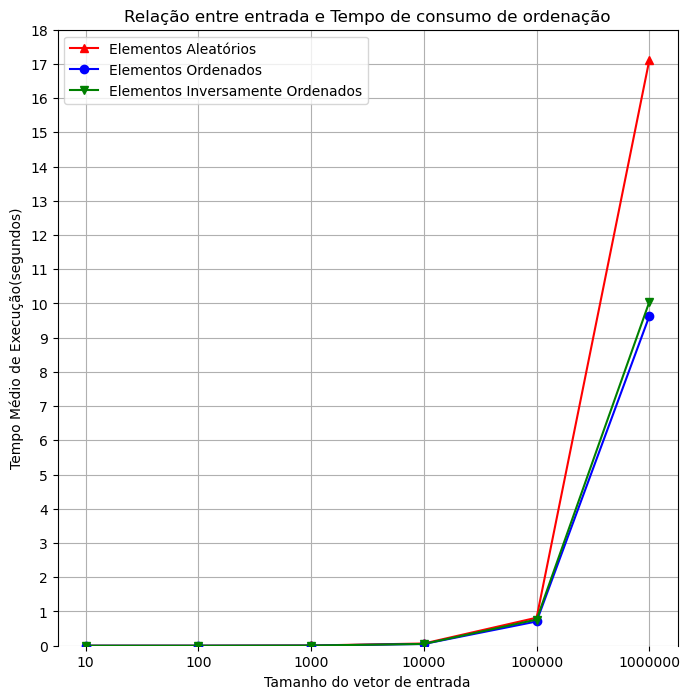

In [245]:
INTERVALO_PLOTAGEM = 1
constroiGraficoCompara(ARRAY_RS_RG,ARRAY_RS_OG,ARRAY_RS_IG, INTERVALO_PLOTAGEM)

## HeapSort

### Cáculo do Tempo do HeapSort - Array de elementos aleatórios

In [119]:
# Chamada para o heapSort com 10 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_1, aux_generate="random_generate")

Algoritmos: heapSort. Tempos de execução: [3.0499999411404133e-05, 2.1200045011937618e-05, 2.119992859661579e-05]. Média das execuções: 2.4299991006652515e-05


In [121]:
# Chamada para o heapSort com 100 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_2, aux_generate="random_generate")

Algoritmos: heapSort. Tempos de execução: [0.0008295999141409993, 0.0004910000134259462, 0.0012286000419408083]. Média das execuções: 0.0008497333231692513


In [123]:
# Chamada para o heapSort com 1000 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_3, aux_generate="random_generate")

Algoritmos: heapSort. Tempos de execução: [0.012529500061646104, 0.007368799997493625, 0.007165100076235831]. Média das execuções: 0.00902113337845852


In [125]:
# Chamada para o heapSort com 10000 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_4, aux_generate="random_generate")

Algoritmos: heapSort. Tempos de execução: [0.15668999997433275, 0.12944170006085187, 0.13791649998165667]. Média das execuções: 0.14134940000561377


In [127]:
# Chamada para o heapSort com 100000 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_5, aux_generate="random_generate")

Algoritmos: heapSort. Tempos de execução: [1.9233208000659943, 1.8129551999736577, 1.8149206000380218]. Média das execuções: 1.850398866692558


In [129]:
# Chamada para o heapSort com 1000000 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_6, aux_generate="random_generate")

Algoritmos: heapSort. Tempos de execução: [29.090834800037555, 29.21295590000227, 26.05946420005057]. Média das execuções: 28.1210849666968


### Plotagem do gráfico do HeapSort - Array de elementos aleatórios

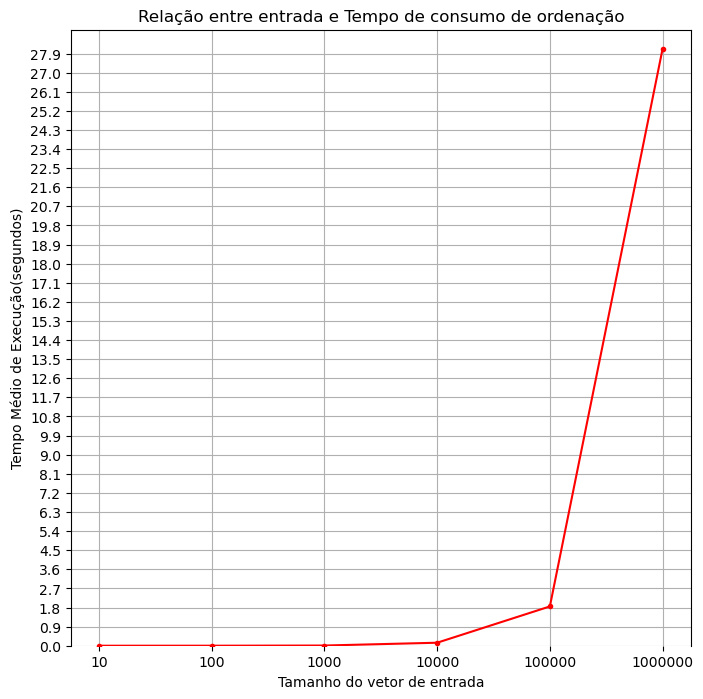

In [27]:
ARRAY_HS_RG = []
ARRAY_HS_RG.append(2.4299991006652515e-05)
ARRAY_HS_RG.append(0.0008497333231692513)
ARRAY_HS_RG.append(0.00902113337845852)
ARRAY_HS_RG.append(0.14134940000561377)
ARRAY_HS_RG.append(1.850398866692558)
ARRAY_HS_RG.append(28.1210849666968)

INTERVALO_PLOTAGEM = 0.9

constroiGrafico(ARRAY_PLOT_X,ARRAY_HS_RG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do HeapSort - Array de elementos ordenados

In [131]:
# Chamada para o heapSort com 10 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_1, aux_generate="order_generate")

Algoritmos: heapSort. Tempos de execução: [8.729996625334024e-05, 7.800001185387373e-05, 7.850001566112041e-05]. Média das execuções: 8.12666645894448e-05


In [133]:
# Chamada para o heapSort com 100 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_2, aux_generate="order_generate")

Algoritmos: heapSort. Tempos de execução: [0.0005342999938875437, 0.0005526000168174505, 0.0005596000701189041]. Média das execuções: 0.0005488333602746328


In [135]:
# Chamada para o heapSort com 1000 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_3, aux_generate="order_generate")

Algoritmos: heapSort. Tempos de execução: [0.015448699938133359, 0.0137135999975726, 0.008368400041945279]. Média das execuções: 0.012510233325883746


In [137]:
# Chamada para o heapSort com 10000 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_4, aux_generate="order_generate")

Algoritmos: heapSort. Tempos de execução: [0.1544931000098586, 0.16053839994128793, 0.10303940006997436]. Média das execuções: 0.13935696667370698


In [139]:
# Chamada para o heapSort com 100000 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_5, aux_generate="order_generate")

Algoritmos: heapSort. Tempos de execução: [1.807562500005588, 1.6723809998948127, 1.7147612000117078]. Média das execuções: 1.731568233304036


In [141]:
# Chamada para o heapSort com 1000000 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_6, aux_generate="order_generate")

Algoritmos: heapSort. Tempos de execução: [20.692661700071767, 19.970522699994035, 20.535484499996528]. Média das execuções: 20.399556300020777


### Plotagem do gráfico do HeapSort - Array de elementos ordenados

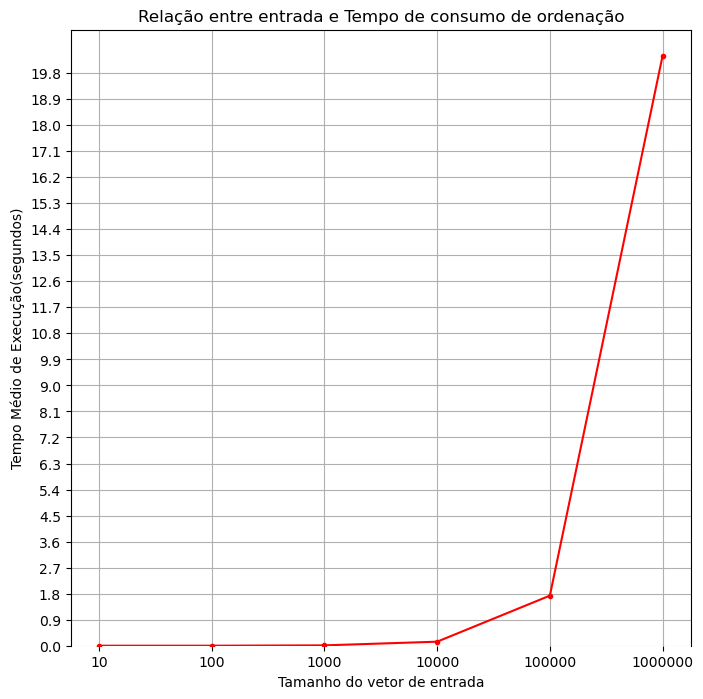

In [28]:
ARRAY_HS_OG = []
ARRAY_HS_OG.append(8.12666645894448e-05)
ARRAY_HS_OG.append(0.0005488333602746328)
ARRAY_HS_OG.append(0.012510233325883746)
ARRAY_HS_OG.append(0.13935696667370698)
ARRAY_HS_OG.append(1.731568233304036)
ARRAY_HS_OG.append(20.399556300020777)

INTERVALO_PLOTAGEM = 0.9

constroiGrafico(ARRAY_PLOT_X,ARRAY_HS_OG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do HeapSort - Array de elementos inversamente ordenados

In [143]:
# Chamada para o heapSort com 10 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_1, aux_generate="inverse_order_generate")

Algoritmos: heapSort. Tempos de execução: [8.219992741942406e-05, 7.229996845126152e-05, 7.449998520314693e-05]. Média das execuções: 7.63332936912775e-05


In [145]:
# Chamada para o heapSort com 100 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_2, aux_generate="inverse_order_generate")

Algoritmos: heapSort. Tempos de execução: [0.0013713000807911158, 0.0008464000420644879, 0.0008928000461310148]. Média das execuções: 0.0010368333896622062


In [149]:
# Chamada para o heapSort com 1000 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_3, aux_generate="inverse_order_generate")

Algoritmos: heapSort. Tempos de execução: [0.01155950000975281, 0.011571099981665611, 0.012098400038667023]. Média das execuções: 0.011743000010028481


In [151]:
# Chamada para o heapSort com 10000 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_4, aux_generate="inverse_order_generate")

Algoritmos: heapSort. Tempos de execução: [0.15669350000098348, 0.1540530000347644, 0.09969770000316203]. Média das execuções: 0.1368147333463033


In [153]:
# Chamada para o heapSort com 100000 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_5, aux_generate="inverse_order_generate")

Algoritmos: heapSort. Tempos de execução: [1.853034400031902, 1.6526551999850199, 1.5652069000061601]. Média das execuções: 1.6902988333410274


In [155]:
# Chamada para o heapSort com 1000000 elementos 
run_sorting_algorithm(algorithm="heapSort", n=ARRAY_LENGTH_6, aux_generate="inverse_order_generate")

Algoritmos: heapSort. Tempos de execução: [19.986741699976847, 19.479789500008337, 19.135140900034457]. Média das execuções: 19.53389070000655


### Plotagem do gráfico do HeapSort - Array de elementos inversamente ordenados

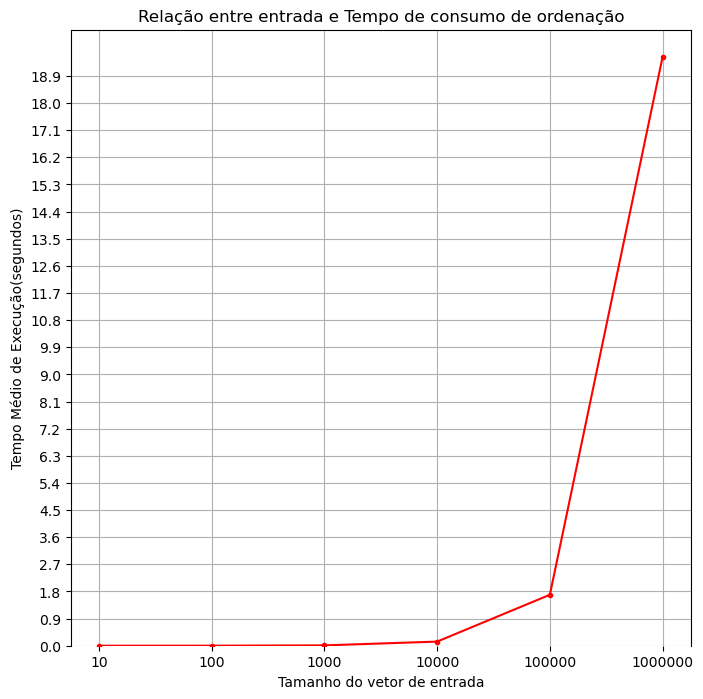

In [29]:
ARRAY_HS_IG = []
ARRAY_HS_IG.append(7.63332936912775e-05)
ARRAY_HS_IG.append(0.0010368333896622062)
ARRAY_HS_IG.append(0.011743000010028481)
ARRAY_HS_IG.append(0.1368147333463033)
ARRAY_HS_IG.append(1.6902988333410274)
ARRAY_HS_IG.append(19.53389070000655)

INTERVALO_PLOTAGEM = 0.9

constroiGrafico(ARRAY_PLOT_X,ARRAY_HS_IG,INTERVALO_PLOTAGEM)

### Plotagem comparativa dos Gráficos - HeapSort

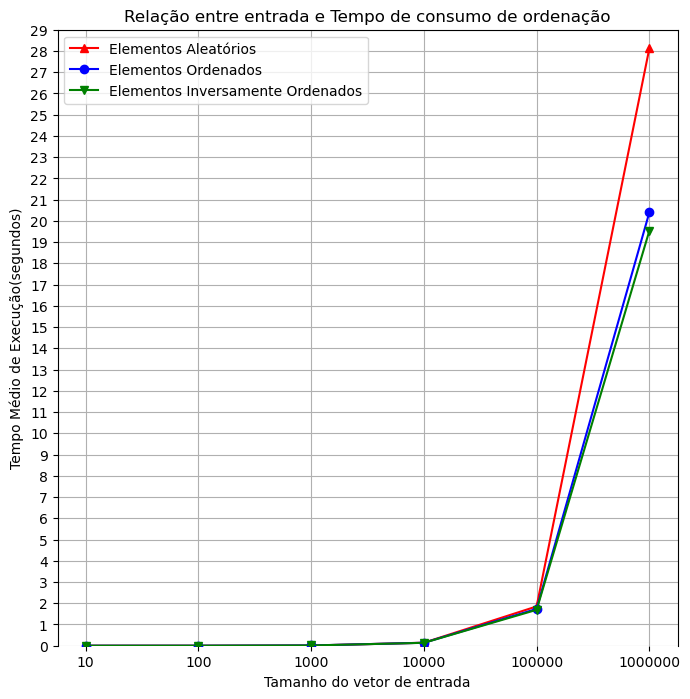

In [253]:
INTERVALO_PLOTAGEM = 1
constroiGraficoCompara(ARRAY_HS_RG,ARRAY_HS_OG,ARRAY_HS_IG, INTERVALO_PLOTAGEM)

## ShellSort

### Cáculo do Tempo do ShellSort - Array de elementos aleatórios

In [160]:
# Chamada para o shellSort com 10 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_1, aux_generate="random_generate")

Algoritmos: shellSort. Tempos de execução: [3.5400036722421646e-05, 2.2399937734007835e-05, 2.2699940018355846e-05]. Média das execuções: 2.6833304824928444e-05


In [162]:
# Chamada para o shellSort com 100 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_2, aux_generate="random_generate")

Algoritmos: shellSort. Tempos de execução: [0.0001542000100016594, 0.0001319999573752284, 0.00026050000451505184]. Média das execuções: 0.00018223332396397987


In [164]:
# Chamada para o shellSort com 1000 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_3, aux_generate="random_generate")

Algoritmos: shellSort. Tempos de execução: [0.006687199929729104, 0.0066402999218553305, 0.004628599970601499]. Média das execuções: 0.005985366607395311


In [166]:
# Chamada para o shellSort com 10000 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_4, aux_generate="random_generate")

Algoritmos: shellSort. Tempos de execução: [0.06529689999297261, 0.08377699996344745, 0.060888699954375625]. Média das execuções: 0.06998753330359857


In [168]:
# Chamada para o shellSort com 100000 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_5, aux_generate="random_generate")

Algoritmos: shellSort. Tempos de execução: [1.0422605000203475, 1.0146719999611378, 1.1308068999787793]. Média das execuções: 1.0625797999867548


In [170]:
# Chamada para o shellSort com 1000000 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_6, aux_generate="random_generate")

Algoritmos: shellSort. Tempos de execução: [21.77802630001679, 22.198177200043574, 22.56408999999985]. Média das execuções: 22.180097833353404


### Plotagem do gráfico do ShellSort - Array de elementos aleatórios

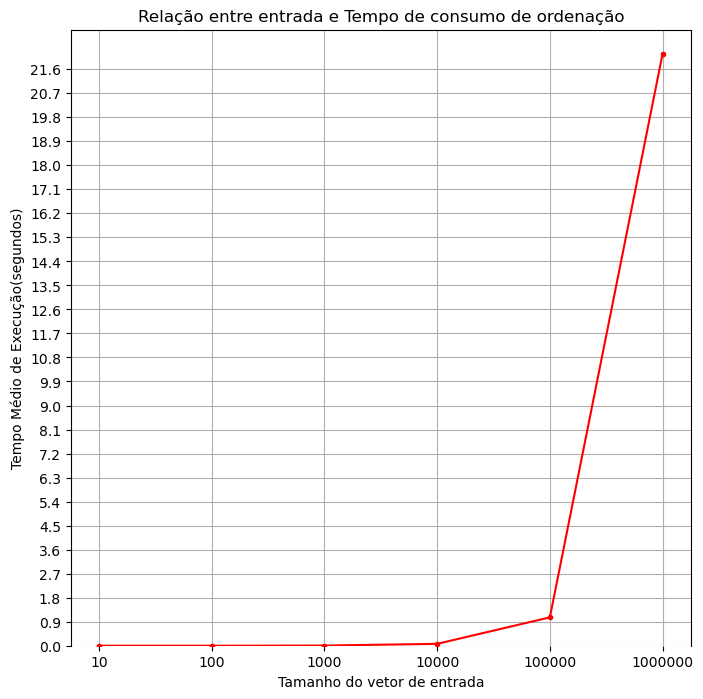

In [30]:
ARRAY_SS_RG = []
ARRAY_SS_RG.append(2.6833304824928444e-05)
ARRAY_SS_RG.append(0.00018223332396397987)
ARRAY_SS_RG.append(0.005985366607395311)
ARRAY_SS_RG.append(0.06998753330359857)
ARRAY_SS_RG.append(1.0625797999867548)
ARRAY_SS_RG.append(22.180097833353404)

INTERVALO_PLOTAGEM = 0.9

constroiGrafico(ARRAY_PLOT_X,ARRAY_SS_RG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do ShellSort - Array de elementos ordenados

In [172]:
# Chamada para o shellSort com 10 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_1, aux_generate="order_generate")

Algoritmos: shellSort. Tempos de execução: [2.4999957531690598e-05, 2.119992859661579e-05, 2.2699940018355846e-05]. Média das execuções: 2.2966608715554077e-05


In [174]:
# Chamada para o shellSort com 100 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_2, aux_generate="order_generate")

Algoritmos: shellSort. Tempos de execução: [9.979994501918554e-05, 9.750004392117262e-05, 9.650003630667925e-05]. Média das execuções: 9.793334174901247e-05


In [176]:
# Chamada para o shellSort com 1000 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_3, aux_generate="order_generate")

Algoritmos: shellSort. Tempos de execução: [0.004524399992078543, 0.004164700047113001, 0.0040457999566569924]. Média das execuções: 0.0042449666652828455


In [178]:
# Chamada para o shellSort com 10000 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_4, aux_generate="order_generate")

Algoritmos: shellSort. Tempos de execução: [0.05393309995997697, 0.06227140000555664, 0.07221089990343899]. Média das execuções: 0.06280513328965753


In [180]:
# Chamada para o shellSort com 100000 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_5, aux_generate="order_generate")

Algoritmos: shellSort. Tempos de execução: [0.6417105000000447, 0.6372791000176221, 0.5224021000321954]. Média das execuções: 0.6004639000166208


In [182]:
# Chamada para o shellSort com 1000000 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_6, aux_generate="order_generate")

Algoritmos: shellSort. Tempos de execução: [6.397191199939698, 6.430061600054614, 6.457241699914448]. Média das execuções: 6.42816483330292


### Plotagem do gráfico do ShellSort - Array de elementos ordenados

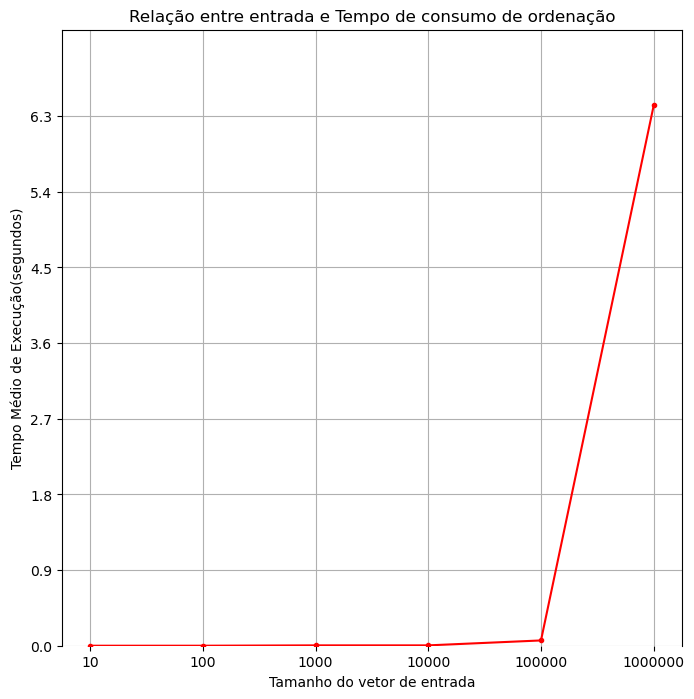

In [31]:
ARRAY_SS_OG = []
ARRAY_SS_OG.append(2.2966608715554077e-05)
ARRAY_SS_OG.append(9.793334174901247e-05)
ARRAY_SS_OG.append(0.0042449666652828455)
ARRAY_SS_OG.append(0.0042449666652828455)
ARRAY_SS_OG.append(0.06280513328965753)
ARRAY_SS_OG.append(6.42816483330292)

INTERVALO_PLOTAGEM = 0.9

constroiGrafico(ARRAY_PLOT_X,ARRAY_SS_OG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do ShellSort - Array de elementos inversamente ordenados

In [184]:
# Chamada para o shellSort com 10 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_1, aux_generate="inverse_order_generate")

Algoritmos: shellSort. Tempos de execução: [2.1600048057734966e-05, 1.4599994756281376e-05, 1.3999990187585354e-05]. Média das execuções: 1.6733344333867233e-05


In [186]:
# Chamada para o shellSort com 100 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_2, aux_generate="inverse_order_generate")

Algoritmos: shellSort. Tempos de execução: [0.00012440001592040062, 0.0001257999101653695, 0.00016529997810721397]. Média das execuções: 0.00013849996806432804


In [188]:
# Chamada para o shellSort com 1000 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_3, aux_generate="inverse_order_generate")

Algoritmos: shellSort. Tempos de execução: [0.005100800073705614, 0.004965799977071583, 0.00321189989335835]. Média das execuções: 0.004426166648045182


In [190]:
# Chamada para o shellSort com 10000 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_4, aux_generate="inverse_order_generate")

Algoritmos: shellSort. Tempos de execução: [0.04666280001401901, 0.06542130000889301, 0.06699479999952018]. Média das execuções: 0.05969296667414407


In [192]:
# Chamada para o shellSort com 100000 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_5, aux_generate="inverse_order_generate")

Algoritmos: shellSort. Tempos de execução: [0.6582314999541268, 0.7329453000565991, 0.6091234999476001]. Média das execuções: 0.6667667666527753


In [194]:
# Chamada para o shellSort com 1000000 elementos 
run_sorting_algorithm(algorithm="shellSort", n=ARRAY_LENGTH_6, aux_generate="inverse_order_generate")

Algoritmos: shellSort. Tempos de execução: [8.078943899949081, 8.006852700025775, 7.738673500018194]. Média das execuções: 7.941490033331017


### Plotagem do gráfico do ShellSort - Array de elementos inversamente ordenados

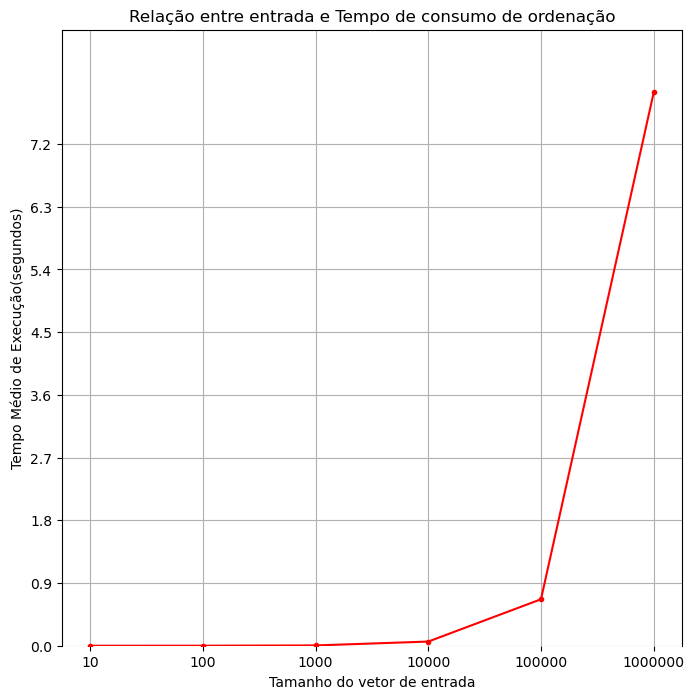

In [32]:
ARRAY_SS_IG = []
ARRAY_SS_IG.append(1.6733344333867233e-05)
ARRAY_SS_IG.append(0.00013849996806432804)
ARRAY_SS_IG.append(0.0042449666652828455)
ARRAY_SS_IG.append(0.05969296667414407)
ARRAY_SS_IG.append(0.6667667666527753)
ARRAY_SS_IG.append(7.941490033331017)

INTERVALO_PLOTAGEM = 0.9

constroiGrafico(ARRAY_PLOT_X,ARRAY_SS_IG,INTERVALO_PLOTAGEM)

### Plotagem comparativa dos Gráficos - ShellSort

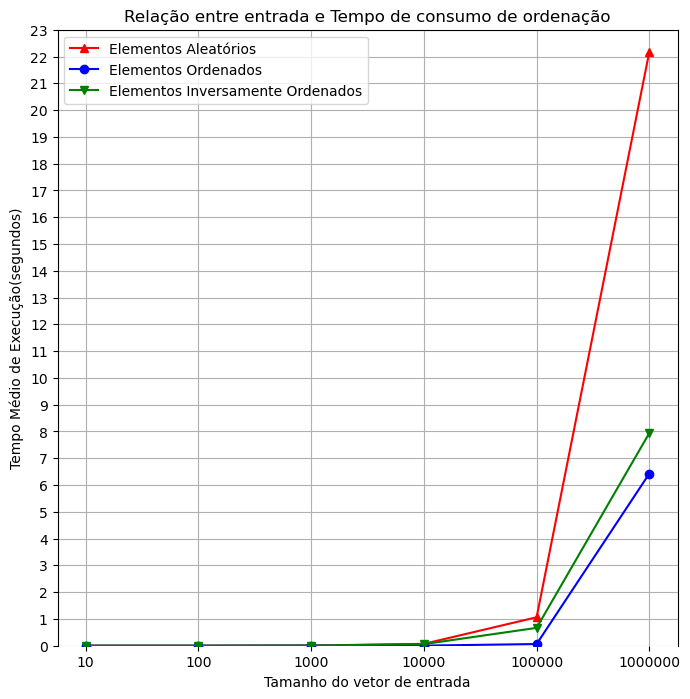

In [261]:
INTERVALO_PLOTAGEM = 1
constroiGraficoCompara(ARRAY_SS_RG,ARRAY_SS_OG,ARRAY_SS_IG, INTERVALO_PLOTAGEM)

## MergeSort

### Cáculo do Tempo do MergeSort - Array de elementos aleatórios

In [199]:
# Chamada para o mergeSort com 10 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_1, aux_generate="random_generate")

Algoritmos: mergeSort. Tempos de execução: [4.640000406652689e-05, 3.350002225488424e-05, 3.439991269260645e-05]. Média das execuções: 3.809997967133919e-05


In [201]:
# Chamada para o mergeSort com 100 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_2, aux_generate="random_generate")

Algoritmos: mergeSort. Tempos de execução: [0.00027439999394118786, 0.00024610001128166914, 0.00025289994664490223]. Média das execuções: 0.00025779998395591974


In [203]:
# Chamada para o mergeSort com 1000 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_3, aux_generate="random_generate")

Algoritmos: mergeSort. Tempos de execução: [0.006525399978272617, 0.007451800047419965, 0.005104699986986816]. Média das execuções: 0.0063606333375598


In [205]:
# Chamada para o mergeSort com 10000 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_4, aux_generate="random_generate")

Algoritmos: mergeSort. Tempos de execução: [0.06189110002014786, 0.09009830001741648, 0.08710300002712756]. Média das execuções: 0.07969746668823063


In [207]:
# Chamada para o mergeSort com 100000 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_5, aux_generate="random_generate")

Algoritmos: mergeSort. Tempos de execução: [0.9889734999742359, 0.9470654999604449, 1.0100613000104204]. Média das execuções: 0.9820334333150337


In [209]:
# Chamada para o mergeSort com 1000000 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_6, aux_generate="random_generate")

Algoritmos: mergeSort. Tempos de execução: [12.884538499987684, 13.853559299954213, 13.218721600016579]. Média das execuções: 13.31893979998616


### Plotagem do gráfico do MergeSort - Array de elementos aleatórios

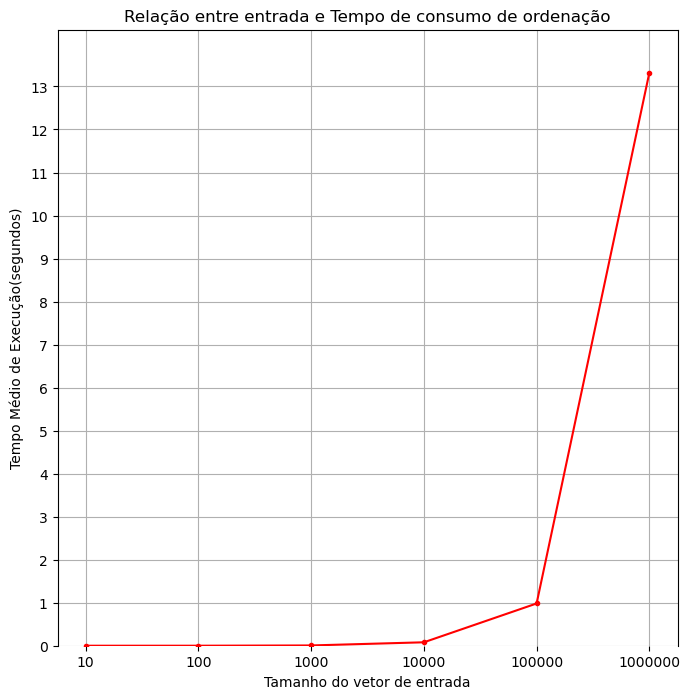

In [33]:
ARRAY_MS_RG = []
ARRAY_MS_RG.append(3.809997967133919e-05)
ARRAY_MS_RG.append(0.00025779998395591974)
ARRAY_MS_RG.append(0.0063606333375598)
ARRAY_MS_RG.append(0.07969746668823063)
ARRAY_MS_RG.append(0.9820334333150337)
ARRAY_MS_RG.append(13.31893979998616)

INTERVALO_PLOTAGEM = 1

constroiGrafico(ARRAY_PLOT_X,ARRAY_MS_RG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do MergeSort - Array de elementos ordenados

In [211]:
# Chamada para o mergeSort com 10 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_1, aux_generate="order_generate")

Algoritmos: mergeSort. Tempos de execução: [5.0600036047399044e-05, 4.169996827840805e-05, 3.7499936297535896e-05]. Média das execuções: 4.3266646874447666e-05


In [213]:
# Chamada para o mergeSort com 100 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_2, aux_generate="order_generate")

Algoritmos: mergeSort. Tempos de execução: [0.0004913000157102942, 0.0004650999326258898, 0.00045229995157569647]. Média das execuções: 0.00046956663330396015


In [215]:
# Chamada para o mergeSort com 1000 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_3, aux_generate="order_generate")

Algoritmos: mergeSort. Tempos de execução: [0.007374699926003814, 0.006097799981944263, 0.0031817000126466155]. Média das execuções: 0.005551399973531564


In [217]:
# Chamada para o mergeSort com 10000 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_4, aux_generate="order_generate")

Algoritmos: mergeSort. Tempos de execução: [0.062100799987092614, 0.08556709997355938, 0.058032199973240495]. Média das execuções: 0.06856669997796416


In [219]:
# Chamada para o mergeSort com 100000 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_5, aux_generate="order_generate")

Algoritmos: mergeSort. Tempos de execução: [0.8225715000880882, 0.907421899959445, 0.8445056999335065]. Média das execuções: 0.8581663666603466


In [221]:
# Chamada para o mergeSort com 1000000 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_6, aux_generate="order_generate")

Algoritmos: mergeSort. Tempos de execução: [9.346727999974973, 8.884936499991454, 8.754235200001858]. Média das execuções: 8.995299899989428


### Plotagem do gráfico do MergeSort - Array de elementos ordenados

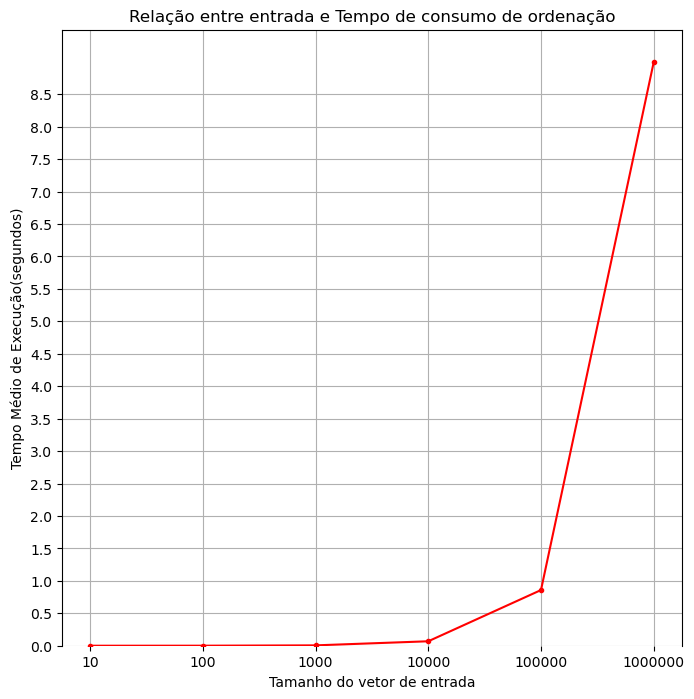

In [34]:
ARRAY_MS_OG = []
ARRAY_MS_OG.append(4.3266646874447666e-05)
ARRAY_MS_OG.append(0.00046956663330396015)
ARRAY_MS_OG.append(0.005551399973531564)
ARRAY_MS_OG.append(0.06856669997796416)
ARRAY_MS_OG.append(0.8581663666603466)
ARRAY_MS_OG.append(8.995299899989428)

INTERVALO_PLOTAGEM = 0.5

constroiGrafico(ARRAY_PLOT_X,ARRAY_MS_OG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do MergeSort - Array de elementos inversamente ordenados

In [223]:
# Chamada para o mergeSort com 10 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_1, aux_generate="inverse_order_generate")

Algoritmos: mergeSort. Tempos de execução: [5.180004518479109e-05, 4.439998883754015e-05, 3.850006032735109e-05]. Média das execuções: 4.490003144989411e-05


In [225]:
# Chamada para o mergeSort com 100 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_2, aux_generate="inverse_order_generate")

Algoritmos: mergeSort. Tempos de execução: [0.0005054000066593289, 0.0004539999645203352, 0.0004542999668046832]. Média das execuções: 0.00047123331266144913


In [227]:
# Chamada para o mergeSort com 1000 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_3, aux_generate="inverse_order_generate")

Algoritmos: mergeSort. Tempos de execução: [0.007491800002753735, 0.0037471000105142593, 0.00469980004709214]. Média das execuções: 0.005312900020120044


In [229]:
# Chamada para o mergeSort com 10000 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_4, aux_generate="inverse_order_generate")

Algoritmos: mergeSort. Tempos de execução: [0.054833600064739585, 0.05649860005360097, 0.05218470003455877]. Média das execuções: 0.05450563338429978


In [231]:
# Chamada para o mergeSort com 100000 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_5, aux_generate="inverse_order_generate")

Algoritmos: mergeSort. Tempos de execução: [0.8358299999963492, 0.6671750000678003, 0.8743560999864712]. Média das execuções: 0.7924537000168735


In [233]:
# Chamada para o mergeSort com 1000000 elementos 
run_sorting_algorithm(algorithm="mergeSort", n=ARRAY_LENGTH_6, aux_generate="inverse_order_generate")

Algoritmos: mergeSort. Tempos de execução: [9.189201999921352, 8.88951290003024, 9.400133199989796]. Média das execuções: 9.159616033313796


### Plotagem do gráfico do MergeSort - Array de elementos inversamente ordenados

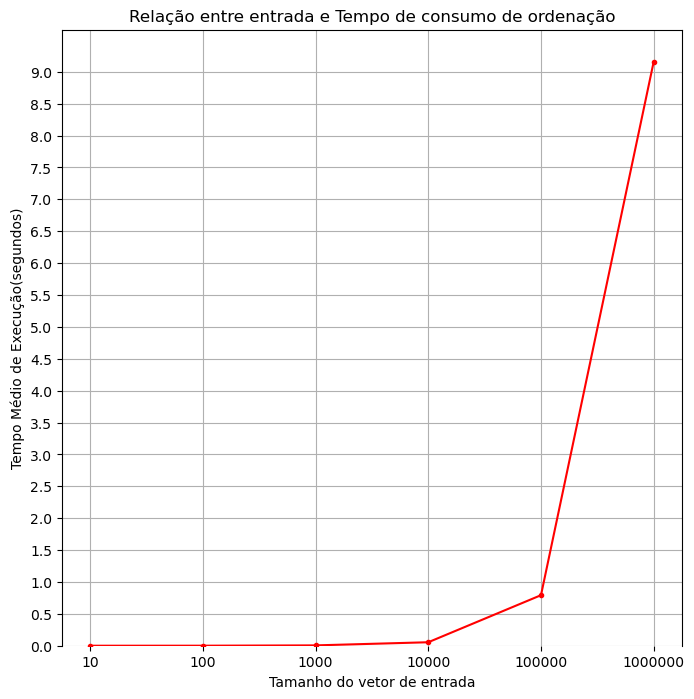

In [35]:
ARRAY_MS_IG = []
ARRAY_MS_IG.append(4.490003144989411e-05)
ARRAY_MS_IG.append(0.00047123331266144913)
ARRAY_MS_IG.append(0.005312900020120044)
ARRAY_MS_IG.append(0.05450563338429978)
ARRAY_MS_IG.append(0.7924537000168735)
ARRAY_MS_IG.append(9.159616033313796)

INTERVALO_PLOTAGEM = 0.5

constroiGrafico(ARRAY_PLOT_X,ARRAY_MS_IG,INTERVALO_PLOTAGEM)

### Plotagem comparativa dos Gráficos - MergeSort

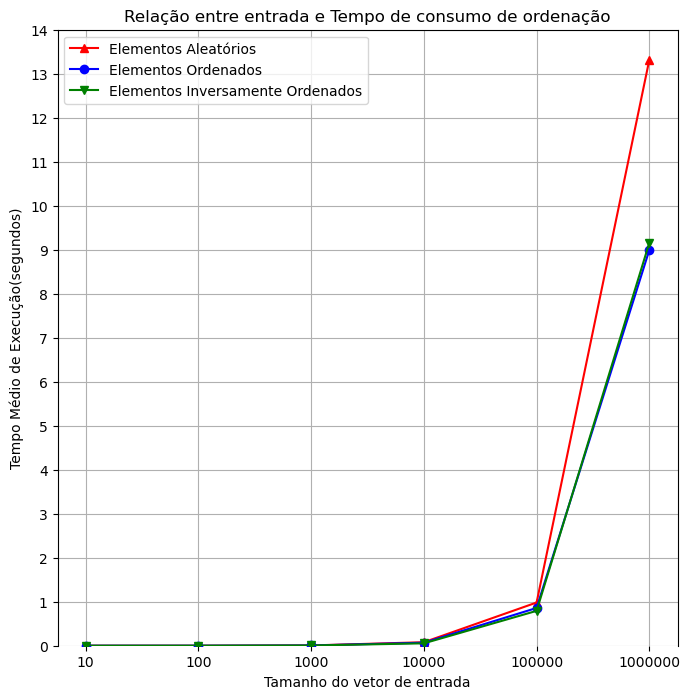

In [269]:
INTERVALO_PLOTAGEM = 1
constroiGraficoCompara(ARRAY_MS_RG,ARRAY_MS_OG,ARRAY_MS_IG, INTERVALO_PLOTAGEM)

## SelectionSort

### Cáculo do Tempo do SelectionSort - Array de elementos aleatórios

In [238]:
# Chamada para o selectionSort com 10 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_1, aux_generate="random_generate")

Algoritmos: selectionSort. Tempos de execução: [2.7799978852272034e-05, 3.999995533376932e-05, 1.910002902150154e-05]. Média das execuções: 2.8966654402514298e-05


In [240]:
# Chamada para o selectionSort com 100 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_2, aux_generate="random_generate")

Algoritmos: selectionSort. Tempos de execução: [0.0006773999193683267, 0.0005751000717282295, 0.0007168999873101711]. Média das execuções: 0.0006564666594689091


In [242]:
# Chamada para o selectionSort com 1000 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_3, aux_generate="random_generate")

Algoritmos: selectionSort. Tempos de execução: [0.08334479993209243, 0.07342459994833916, 0.07640350004658103]. Média das execuções: 0.07772429997567087


In [244]:
# Chamada para o selectionSort com 10000 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_4, aux_generate="random_generate")

Algoritmos: selectionSort. Tempos de execução: [7.6785986999748275, 8.090463900007308, 7.67465339996852]. Média das execuções: 7.814571999983552


In [ ]:
# Chamada para o selectionSort com 100000 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_5, aux_generate="random_generate")

Algoritmos: bubbleSort. Estimativa de tempo de execução: 781.457 segundos

In [ ]:
# Chamada para o selectionSort com 1000000 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_6, aux_generate="random_generate")

Algoritmos: bubbleSort. Estimativa de tempo de execução: 78145.7 segundos

### Plotagem do gráfico do SelectionSort - Array de elementos aleatórios

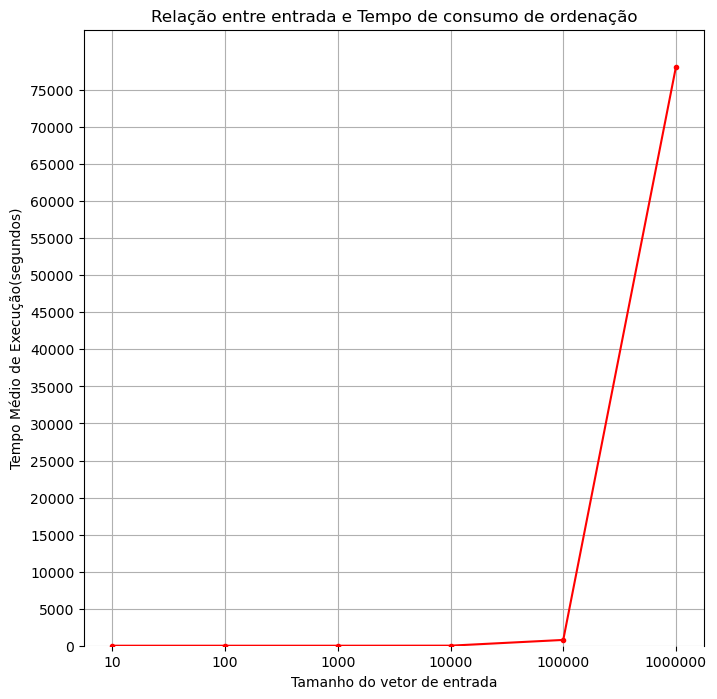

In [37]:
ARRAY_SE_RG = []
ARRAY_SE_RG.append(2.8966654402514298e-05)
ARRAY_SE_RG.append(0.0006564666594689091)
ARRAY_SE_RG.append(0.07772429997567087)
ARRAY_SE_RG.append(7.814571999983552)
ARRAY_SE_RG.append(781.457)
ARRAY_SE_RG.append(78145.7)

INTERVALO_PLOTAGEM = 5000

constroiGrafico(ARRAY_PLOT_X,ARRAY_SE_RG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do SelectionSort - Array de elementos ordenados

In [102]:
# Chamada para o selectionSort com 10 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_1, aux_generate="order_generate")

Algoritmos: selectionSort. Tempos de execução: [1.7799990018829703e-05, 8.000002708286047e-06, 7.800001185387373e-06]. Média das execuções: 1.1199997970834374e-05


1.1199997970834374e-05

In [104]:
# Chamada para o selectionSort com 100 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_2, aux_generate="order_generate")

Algoritmos: selectionSort. Tempos de execução: [0.00040619997889734805, 0.000440800009528175, 0.00036810000892728567]. Média das execuções: 0.00040503333245093626


0.00040503333245093626

In [106]:
# Chamada para o selectionSort com 1000 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_3, aux_generate="order_generate")

Algoritmos: selectionSort. Tempos de execução: [0.10019220001413487, 0.08060340001247823, 0.11769590000039898]. Média das execuções: 0.0994971666756707


0.0994971666756707

In [108]:
# Chamada para o selectionSort com 10000 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_4, aux_generate="order_generate")

Algoritmos: selectionSort. Tempos de execução: [8.554695799975889, 7.811264699994354, 7.767857099999674]. Média das execuções: 8.044605866656639


8.044605866656639

In [ ]:
# Chamada para o selectionSort com 100000 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_5, aux_generate="order_generate")

Algoritmos: selectionSort. Estimativa de tempo de execução: 804 segundos ou 13.4 minutos

In [ ]:
# Chamada para o selectionSort com 1000000 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_6, aux_generate="order_generate")

Algoritmos: selectionSort. Estimativa de tempo de execução: 80400 segundos ou 22.33 horas

### Plotagem do gráfico do SelectionSort - Array de elementos ordenados

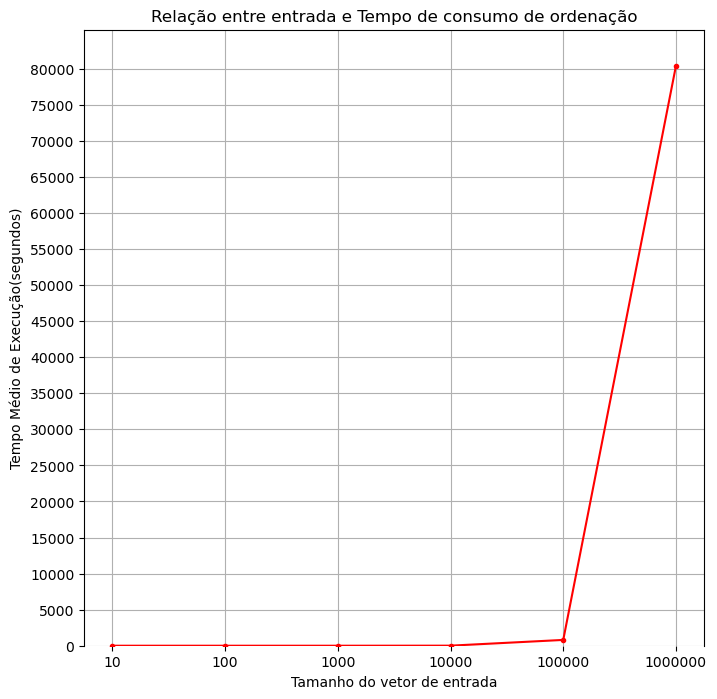

In [38]:
ARRAY_SE_OG = []
ARRAY_SE_OG.append(1.1199997970834374e-05)
ARRAY_SE_OG.append(0.00040503333245093626)
ARRAY_SE_OG.append(0.0994971666756707)
ARRAY_SE_OG.append(8.044605866656639)
ARRAY_SE_OG.append(804)
ARRAY_SE_OG.append(80400)

INTERVALO_PLOTAGEM = 5000

constroiGrafico(ARRAY_PLOT_X,ARRAY_SE_OG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do SelectionSort - Array de elementos inversamente ordenados

In [15]:
# Chamada para o selectionSort com 10 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_1, aux_generate="inverse_order_generate")

Algoritmos: selectionSort. Tempos de execução: [4.8800000058690784e-05, 4.37000001056731e-05, 4.340000009506184e-05]. Média das execuções: 4.5300000086475244e-05


4.5300000086475244e-05

In [16]:
# Chamada para o selectionSort com 100 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_2, aux_generate="inverse_order_generate")

Algoritmos: selectionSort. Tempos de execução: [0.004340400000046429, 0.002631000000064887, 0.002303600000004735]. Média das execuções: 0.0030916666667053505


0.0030916666667053505

In [17]:
# Chamada para o selectionSort com 1000 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_3, aux_generate="inverse_order_generate")

Algoritmos: selectionSort. Tempos de execução: [0.27847350000001825, 0.2974077000001216, 0.28208870000003117]. Média das execuções: 0.28598996666672366


0.28598996666672366

In [18]:
# Chamada para o selectionSort com 10000 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_4, aux_generate="inverse_order_generate")

Algoritmos: selectionSort. Tempos de execução: [29.850767200000064, 28.8055046999998, 30.38152869999999]. Média das execuções: 29.67926686666662


29.67926686666662

In [ ]:
# Chamada para o selectionSort com 100000 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_5, aux_generate="inverse_order_generate")

Algoritmos: selectionSort. Estimativa de tempo de execução: 2967.93 segundos

In [ ]:
# Chamada para o selectionSort com 1000000 elementos 
run_sorting_algorithm(algorithm="selectionSort", n=ARRAY_LENGTH_6, aux_generate="inverse_order_generate")

Algoritmos: selectionSort. Estimativa de tempo de execução: 296793 segundos

### Plotagem do gráfico do SelectionSort - Array de elementos inversamente ordenados

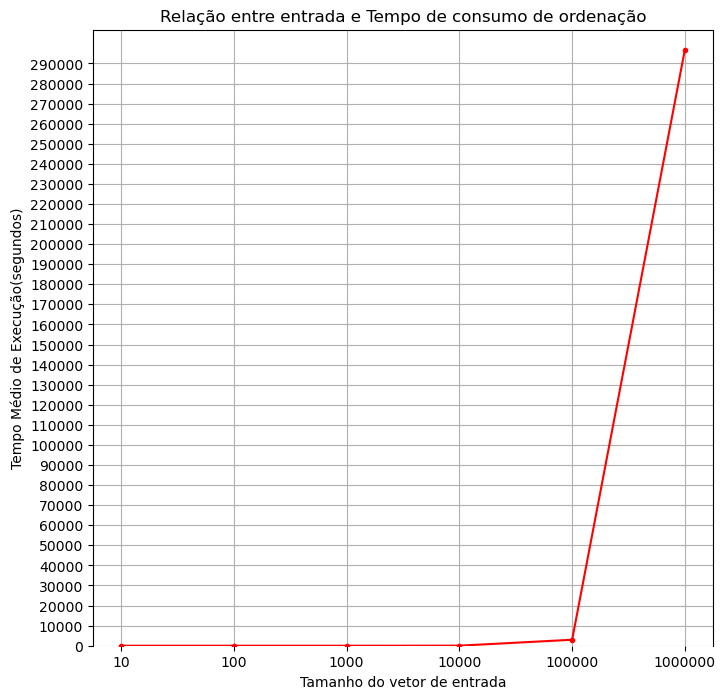

In [39]:
ARRAY_SE_IG = []
ARRAY_SE_IG.append(4.5300000086475244e-05)
ARRAY_SE_IG.append(0.0030916666667053505)
ARRAY_SE_IG.append(0.28598996666672366)
ARRAY_SE_IG.append(29.67926686666662)
ARRAY_SE_IG.append(2967.93)
ARRAY_SE_IG.append(296793)

INTERVALO_PLOTAGEM = 10000

constroiGrafico(ARRAY_PLOT_X,ARRAY_SE_IG,INTERVALO_PLOTAGEM)

### Plotagem comparativa dos Gráficos - SelectionSort

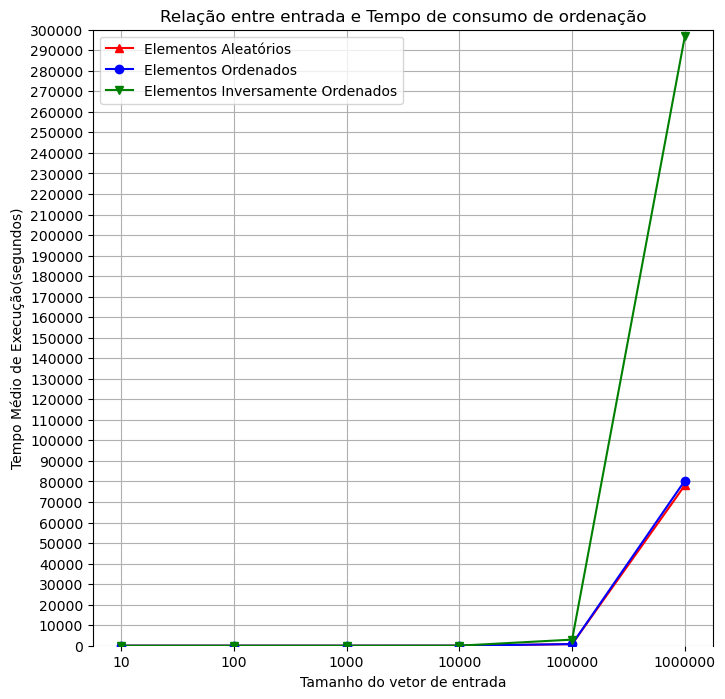

In [277]:
INTERVALO_PLOTAGEM = 10000
constroiGraficoCompara(ARRAY_SE_RG,ARRAY_SE_OG,ARRAY_SE_IG, INTERVALO_PLOTAGEM)

## QuickSort

### Cáculo do Tempo do QuickSort - Array de elementos aleatórios

In [174]:
# Chamada para o quickSort com 10 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_1, aux_generate="random_generate_interval")

Algoritmos: quickSort. Tempos de execução: [6.120000034570694e-05, 5.3000025218352675e-05, 4.4599990360438824e-05]. Média das execuções: 5.293333864149948e-05


5.293333864149948e-05

In [176]:
# Chamada para o quickSort com 100 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_2, aux_generate="random_generate_interval")

Algoritmos: quickSort. Tempos de execução: [0.000662600010400638, 0.0006741000106558204, 0.0006107999943196774]. Média das execuções: 0.0006491666717920452


0.0006491666717920452

In [178]:
# Chamada para o quickSort com 1000 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_3, aux_generate="random_generate_interval")

Algoritmos: quickSort. Tempos de execução: [0.06762980000348762, 0.08605129999341443, 0.04951640000217594]. Média das execuções: 0.06773249999969266


0.06773249999969266

In [ ]:
# Chamada para o quickSort com 10000 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_4, aux_generate="random_generate_interval")

Algoritmos: quickSort. Estimativa de tempo de execução: 90.14 segundos ou 1.5 minutos

In [ ]:
# Chamada para o quickSort com 100000 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_5, aux_generate="random_generate_interval")

Algoritmos: quickSort. Estimativa de tempo de execução: 112.74 segundos ou 1.88 minutos

In [ ]:
# Chamada para o quickSort com 1000000 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_6, aux_generate="random_generate_interval")

Algoritmos: quickSort. Estimativa de tempo de execução: 135.66 ou 2.26 minutos

### Plotagem do gráfico do QuickSort - Array de elementos aleatórios

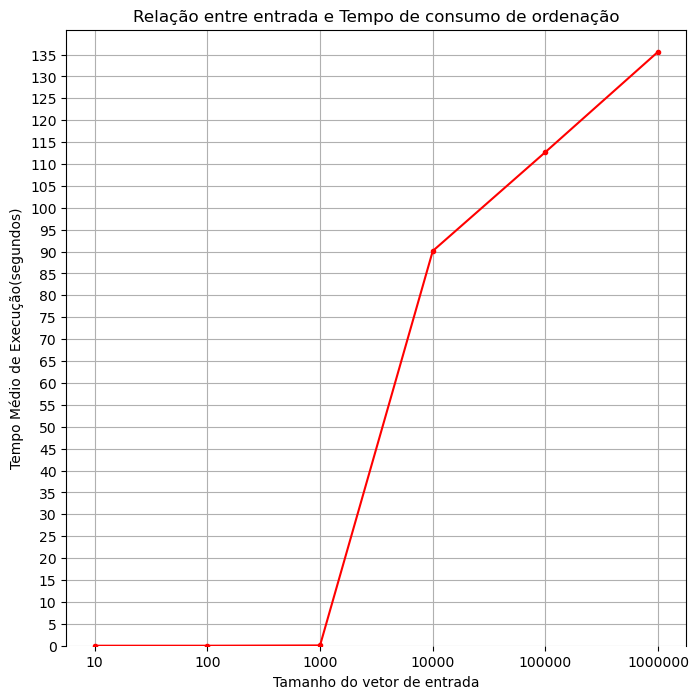

In [40]:
ARRAY_QS_RG = []
ARRAY_QS_RG.append(5.293333864149948e-05)
ARRAY_QS_RG.append(0.0006491666717920452)
ARRAY_QS_RG.append(0.06773249999969266)
ARRAY_QS_RG.append(90.14)
ARRAY_QS_RG.append(112.74)
ARRAY_QS_RG.append(135.66)

INTERVALO_PLOTAGEM = 5

constroiGrafico(ARRAY_PLOT_X,ARRAY_QS_RG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do QuickSort - Array de elementos ordenados

In [182]:
# Chamada para o quickSort com 10 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_1, aux_generate="order_generate_interval")

Algoritmos: quickSort. Tempos de execução: [4.430001717992127e-05, 4.630000330507755e-05, 4.39999857917428e-05]. Média das execuções: 4.4866668758913875e-05


4.4866668758913875e-05

In [184]:
# Chamada para o quickSort com 100 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_2, aux_generate="order_generate_interval")

Algoritmos: quickSort. Tempos de execução: [0.002053599979262799, 0.0016533000161871314, 0.0016754000098444521]. Média das execuções: 0.0017941000017647941


0.0017941000017647941

In [186]:
# Chamada para o quickSort com 1000 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_3, aux_generate="order_generate_interval")

Algoritmos: quickSort. Tempos de execução: [0.10859659998095594, 0.09302029997343197, 0.12012700000195764]. Média das execuções: 0.10724796665211518


0.10724796665211518

In [ ]:
# Chamada para o quickSort com 10000 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_4, aux_generate="order_generate_interval")

Algoritmos: quickSort. Estimativa de tempo de execução: 14.36 segundos ou 0.24 minutos

In [ ]:
# Chamada para o quickSort com 100000 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_5, aux_generate="order_generate_interval")

Algoritmos: quickSort. Estimativa de tempo de execução: 17.93 segundos ou 0.3 minutos

In [ ]:
# Chamada para o quickSort com 1000000 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_6, aux_generate="order_generate_interval")

Algoritmos: selectionSort. Estimativa de tempo de execução: 21.53 segundos

### Plotagem do gráfico do QuickSort - Array de elementos ordenados


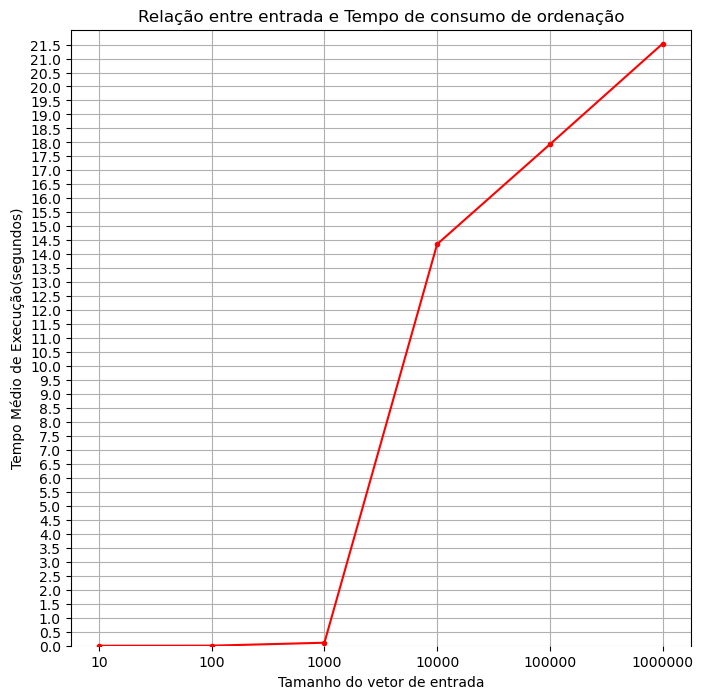

In [41]:
ARRAY_QS_OG = []
ARRAY_QS_OG.append(4.4866668758913875e-05)
ARRAY_QS_OG.append(0.0017941000017647941)
ARRAY_QS_OG.append(0.10724796665211518)
ARRAY_QS_OG.append(14.36)
ARRAY_QS_OG.append(17.93)
ARRAY_QS_OG.append(21.53)

INTERVALO_PLOTAGEM = 0.5

constroiGrafico(ARRAY_PLOT_X,ARRAY_QS_OG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do QuickSort - Array de elementos inversamente ordenados


In [188]:
# Chamada para o quickSort com 10 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_1, aux_generate="inverse_order_generate_interval")

Algoritmos: quickSort. Tempos de execução: [4.75000124424696e-05, 2.060001133941114e-05, 1.889999839477241e-05]. Média das execuções: 2.9000007392217714e-05


2.9000007392217714e-05

In [190]:
# Chamada para o quickSort com 100 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_2, aux_generate="inverse_order_generate_interval")

Algoritmos: quickSort. Tempos de execução: [0.002048599999397993, 0.0015138000017032027, 0.0007837000011932105]. Média das execuções: 0.001448700000764802


0.001448700000764802

In [192]:
# Chamada para o quickSort com 1000 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_3, aux_generate="inverse_order_generate_interval")

Algoritmos: quickSort. Tempos de execução: [0.10931619998882525, 0.08882519998587668, 0.10086399997817352]. Média das execuções: 0.09966846665095848


0.09966846665095848

In [ ]:
# Chamada para o quickSort com 10000 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_4, aux_generate="inverse_order_generate_interval")

Algoritmos: quickSort. Estimativa de tempo de execução: 13.29 segundos ou 0.22 minutos

In [ ]:
# Chamada para o quickSort com 100000 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_5, aux_generate="inverse_order_generate_interval")

Algoritmos: quickSort. Estimativa de tempo de execução: 16.61 segundos ou 0.28 minutos

In [ ]:
# Chamada para o quickSort com 1000000 elementos 
run_sorting_algorithm(algorithm="quickSort", n=ARRAY_LENGTH_6, aux_generate="inverse_order_generate_interval")

Algoritmos: quickSort. Estimativa de tempo de execução: 19.93 segundos ou 0.33 minutos

### Plotagem do gráfico do QuickSort - Array de elementos inversamente ordenados


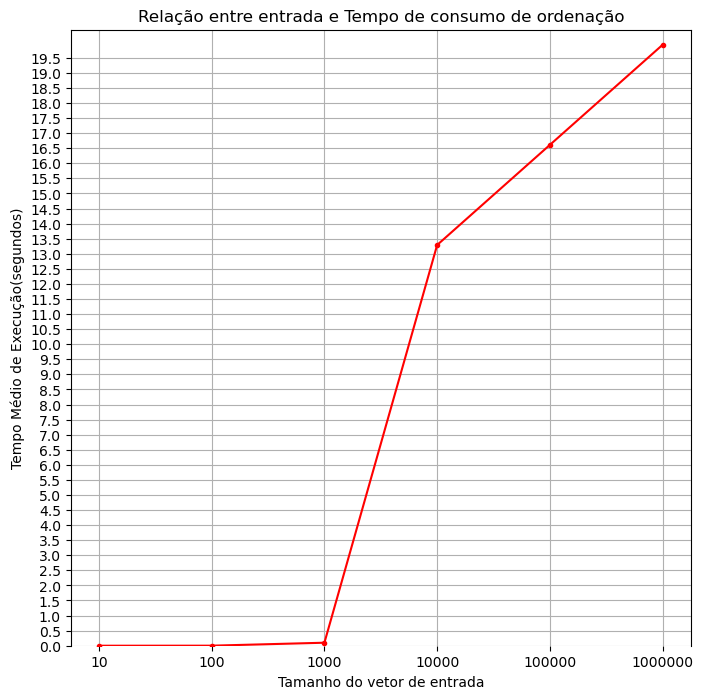

In [42]:
ARRAY_QS_IG = []
ARRAY_QS_IG.append(2.9000007392217714e-05)
ARRAY_QS_IG.append(0.001448700000764802)
ARRAY_QS_IG.append(0.09966846665095848)
ARRAY_QS_IG.append(13.29)
ARRAY_QS_IG.append(16.61)
ARRAY_QS_IG.append(19.93)

INTERVALO_PLOTAGEM = 0.5

constroiGrafico(ARRAY_PLOT_X,ARRAY_QS_IG,INTERVALO_PLOTAGEM)

### Plotagem comparativa dos Gráficos - QuickSort

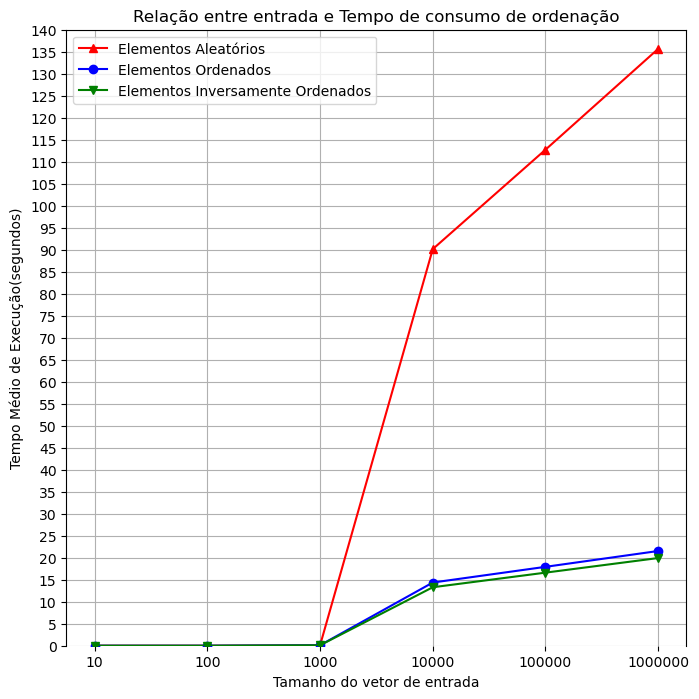

In [224]:
INTERVALO_PLOTAGEM = 5
constroiGraficoCompara(ARRAY_QS_RG,ARRAY_QS_OG,ARRAY_QS_IG, INTERVALO_PLOTAGEM)

## BucketSort

### Cáculo do Tempo do BucketSort - Array de elementos aleatórios

In [138]:
# Chamada para o BucketSort com 10 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_1, aux_generate="random_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [2.939999831141904e-05, 2.3399999918183312e-05, 2.429999949526973e-05]. Média das execuções: 2.5699999241624027e-05


2.5699999241624027e-05

In [140]:
# Chamada para o bucketSort com 100 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_2, aux_generate="random_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [0.0005502999993041158, 0.00040689999877940863, 0.00040050000097835436]. Média das execuções: 0.0004525666663539596


0.0004525666663539596

In [141]:
# Chamada para o bucketSort com 1000 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_3, aux_generate="random_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [0.003214000000298256, 0.0035238999989815056, 0.004033700002764817]. Média das execuções: 0.0035905333340148595


0.0035905333340148595

In [142]:
# Chamada para o bucketSort com 10000 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_4, aux_generate="random_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [0.027031499997974606, 0.023974199997610413, 0.027558999998291256]. Média das execuções: 0.026188233331292093


0.026188233331292093

In [143]:
# Chamada para o bucketSort com 100000 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_5, aux_generate="random_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [0.3107341999966593, 0.2638580999991973, 0.26263900000049034]. Média das execuções: 0.27907709999878233


0.27907709999878233

In [144]:
# Chamada para o bucketSort com 1000000 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_6, aux_generate="random_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [3.762004200001684, 3.5972052000033727, 3.573530199999368]. Média das execuções: 3.644246533334808


3.644246533334808

### Plotagem do gráfico do BucketSort - Array de elementos aleatórios

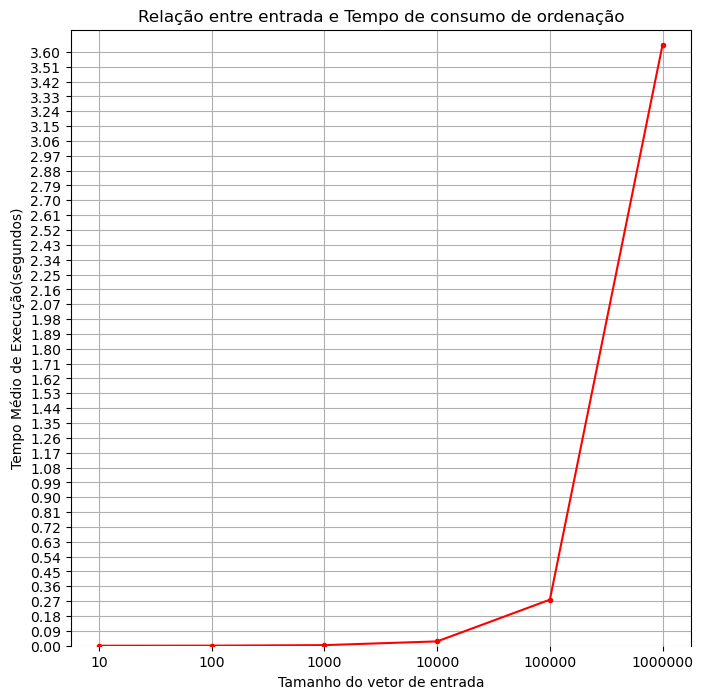

In [43]:
ARRAY_BU_RG = []
ARRAY_BU_RG.append(2.5699999241624027e-05)
ARRAY_BU_RG.append(0.0004525666663539596)
ARRAY_BU_RG.append(0.0035905333340148595)
ARRAY_BU_RG.append(0.026188233331292093)
ARRAY_BU_RG.append(0.27907709999878233)
ARRAY_BU_RG.append(3.644246533334808)

INTERVALO_PLOTAGEM = 0.09

constroiGrafico(ARRAY_PLOT_X,ARRAY_BU_RG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do BucketSort - Array de elementos ordenados

In [145]:
# Chamada para o BucketSort com 10 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_1, aux_generate="order_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [8.769999840296805e-05, 6.829999983892776e-05, 6.84000006003771e-05]. Média das execuções: 7.479999961409096e-05


7.479999961409096e-05

In [146]:
# Chamada para o bucketSort com 100 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_2, aux_generate="order_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [0.0004133000002184417, 0.0004353000003902707, 0.00038750000021536835]. Média das execuções: 0.0004120333336080269


0.0004120333336080269

In [147]:
# Chamada para o bucketSort com 1000 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_3, aux_generate="order_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [0.0023299000022234395, 0.002093099999910919, 0.0020938000016030855]. Média das execuções: 0.0021722666679124814


0.0021722666679124814

In [148]:
# Chamada para o bucketSort com 10000 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_4, aux_generate="order_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [0.02512169999681646, 0.02341800000067451, 0.03361360000053537]. Média das execuções: 0.027384433332675446


0.027384433332675446

In [149]:
# Chamada para o bucketSort com 100000 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_5, aux_generate="order_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [0.25862749999942025, 0.2504391000002215, 0.24268060000031255]. Média das execuções: 0.2505823999999848


0.2505823999999848

In [150]:
# Chamada para o bucketSort com 1000000 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_6, aux_generate="order_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [2.6731373999973584, 2.6517062000020815, 2.639675800000987]. Média das execuções: 2.654839800000142


2.654839800000142

### Plotagem do gráfico do BucketSort - Array de elementos ordenados


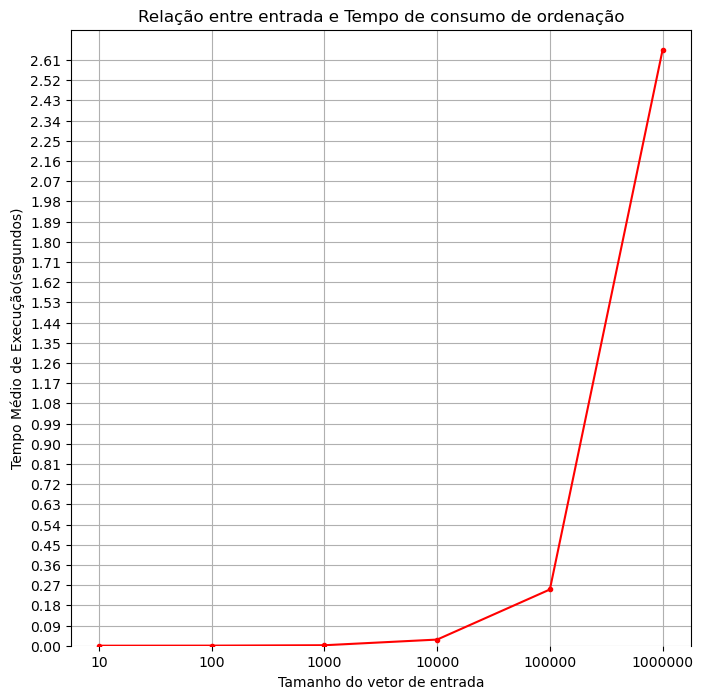

In [44]:
ARRAY_BU_OG = []
ARRAY_BU_OG.append(7.479999961409096e-05)
ARRAY_BU_OG.append(0.0004120333336080269)
ARRAY_BU_OG.append(0.0021722666679124814)
ARRAY_BU_OG.append(0.027384433332675446)
ARRAY_BU_OG.append(0.2505823999999848)
ARRAY_BU_OG.append(2.654839800000142)

INTERVALO_PLOTAGEM = 0.09

constroiGrafico(ARRAY_PLOT_X,ARRAY_BU_OG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do BucketSort - Array de elementos inversamente ordenados


In [174]:
# Chamada para o BucketSort com 10 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_1, aux_generate="inverse_order_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [6.750000102329068e-05, 5.0499998906161636e-05, 5.029999738326296e-05]. Média das execuções: 5.609999910423843e-05


5.609999910423843e-05

In [175]:
# Chamada para o bucketSort com 100 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_2, aux_generate="inverse_order_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [0.00047369999811053276, 0.00048579999929643236, 0.0004802000003110152]. Média das execuções: 0.00047989999923932675


0.00047989999923932675

In [176]:
# Chamada para o bucketSort com 1000 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_3, aux_generate="inverse_order_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [0.003347600002598483, 0.0021118000004207715, 0.0021166000005905516]. Média das execuções: 0.0025253333345366022


0.0025253333345366022

In [177]:
# Chamada para o bucketSort com 10000 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_4, aux_generate="inverse_order_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [0.023436300001776544, 0.023165999999037012, 0.02460570000039297]. Média das execuções: 0.023736000000402175


0.023736000000402175

In [178]:
# Chamada para o bucketSort com 100000 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_5, aux_generate="inverse_order_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [0.25354479999805335, 0.24518370000077994, 0.2460255000005418]. Média das execuções: 0.24825133333312502


0.24825133333312502

In [179]:
# Chamada para o bucketSort com 1000000 elementos 
run_sorting_algorithm(algorithm="bucketSort", n=ARRAY_LENGTH_6, aux_generate="inverse_order_generate_interval")

Algoritmos: bucketSort. Tempos de execução: [2.740955600002053, 2.6991149000023142, 2.694220500001393]. Média das execuções: 2.711430333335253


2.711430333335253

### Plotagem do gráfico do BucketSort - Array de elementos inversamente ordenados


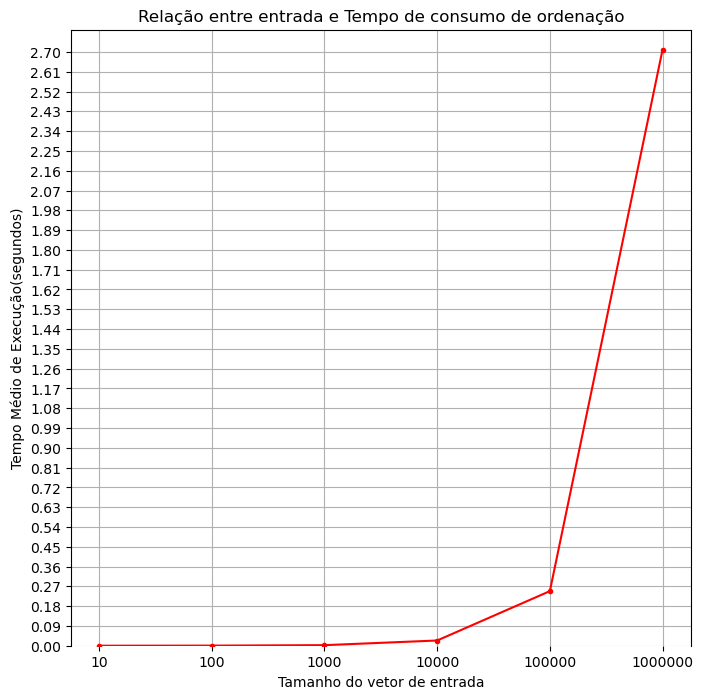

In [45]:
ARRAY_BU_IG = []
ARRAY_BU_IG.append(5.609999910423843e-05)
ARRAY_BU_IG.append(0.00047989999923932675)
ARRAY_BU_IG.append(0.0025253333345366022)
ARRAY_BU_IG.append(0.023736000000402175)
ARRAY_BU_IG.append(0.24825133333312502)
ARRAY_BU_IG.append(2.711430333335253)

INTERVALO_PLOTAGEM = 0.09

constroiGrafico(ARRAY_PLOT_X,ARRAY_BU_IG,INTERVALO_PLOTAGEM)

### Plotagem comparativa dos Gráficos - BucketSort

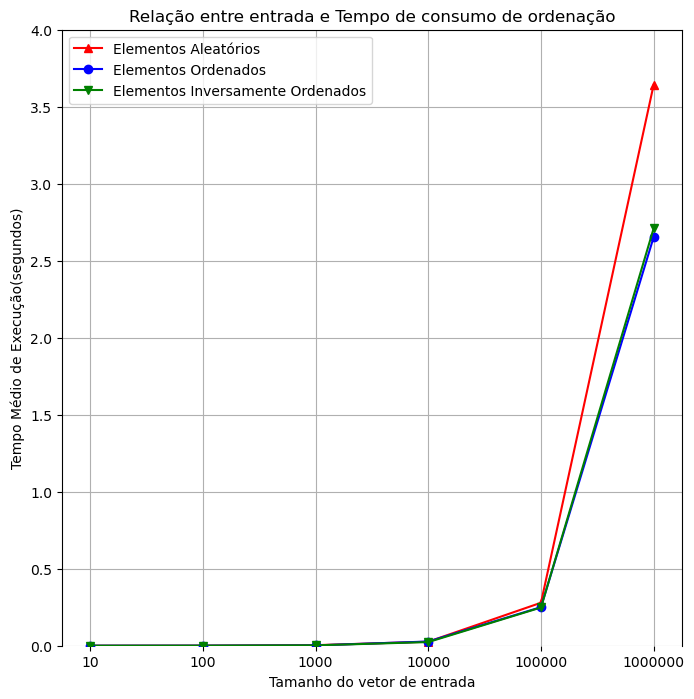

In [285]:
INTERVALO_PLOTAGEM = 0.5
constroiGraficoCompara(ARRAY_BU_RG,ARRAY_BU_OG,ARRAY_BU_IG, INTERVALO_PLOTAGEM)

## InsertionSort

### Cáculo do Tempo do InsertionSort - Array de elementos aleatórios

In [22]:
# Chamada para o insertionSort com 10 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_1, aux_generate="random_generate")

Algoritmos: insertionSort. Tempos de execução: [1.2599999990925426e-05, 9.599999998499698e-06, 9.299999987888441e-06]. Média das execuções: 1.0499999992437855e-05


1.0499999992437855e-05

In [23]:
# Chamada para o insertionSort com 100 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_2, aux_generate="random_generate")

Algoritmos: insertionSort. Tempos de execução: [0.0007764000000634041, 0.0006807999999409731, 0.0007176000000299609]. Média das execuções: 0.0007249333333447794


0.0007249333333447794

In [24]:
# Chamada para o insertionSort com 1000 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_3, aux_generate="random_generate")

Algoritmos: insertionSort. Tempos de execução: [0.045325199999979304, 0.044076600000039434, 0.038688500000034765]. Média das execuções: 0.0426967666666845


0.0426967666666845

In [25]:
# Chamada para o insertionSort com 10000 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_4, aux_generate="random_generate")

Algoritmos: insertionSort. Tempos de execução: [4.095745999999963, 4.179395199999931, 4.182127299999934]. Média das execuções: 4.152422833333276


4.152422833333276

In [26]:
# Chamada para o insertionSort com 100000 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_5, aux_generate="random_generate")

Algoritmos: insertionSort. Tempos de execução: [427.33281520000014, 405.15628160000006, 409.5115644]. Média das execuções: 414.00022040000005


414.00022040000005

In [ ]:
# Chamada para o insertionSort com 1000000 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_6, aux_generate="random_generate")

Algoritmos: insertionSort. Estimativa de tempo de execução: 41400.02 segundos

### Plotagem do gráfico do InsertionSort - Array de elementos aleatórios

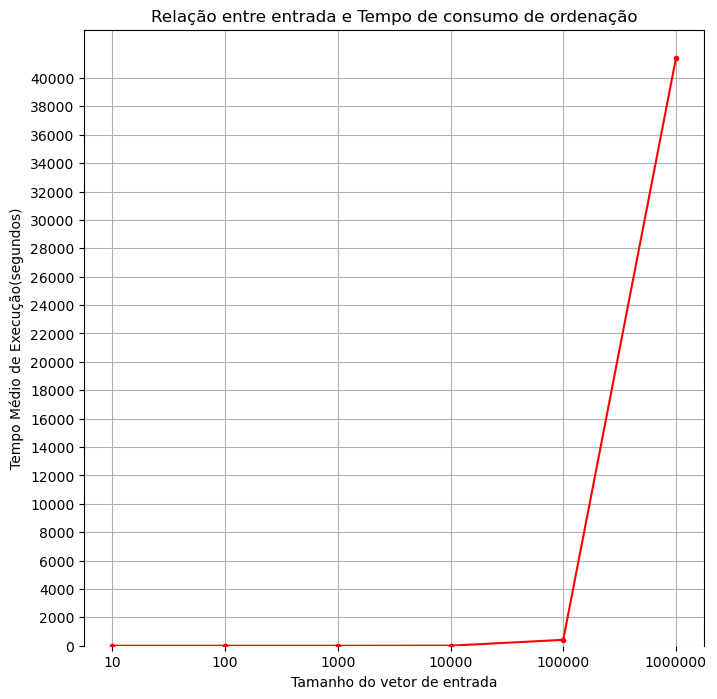

In [48]:
ARRAY_IS_RG = []
ARRAY_IS_RG.append(1.0499999992437855e-05)
ARRAY_IS_RG.append(0.0007249333333447794)
ARRAY_IS_RG.append(0.0426967666666845)
ARRAY_IS_RG.append(4.152422833333276)
ARRAY_IS_RG.append(414.00022040000005)
ARRAY_IS_RG.append(41400.02)

INTERVALO_PLOTAGEM = 2000

constroiGrafico(ARRAY_PLOT_X,ARRAY_IS_RG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do InsertionSort - Array de elementos ordenados

In [35]:
# Chamada para o insertionSort com 10 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_1, aux_generate="order_generate")

Algoritmos: insertionSort. Tempos de execução: [2.5499999992462108e-05, 2.210000002378365e-05, 2.1500000002561137e-05]. Média das execuções: 2.3033333339602297e-05


2.3033333339602297e-05

In [28]:
# Chamada para o insertionSort com 100 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_2, aux_generate="order_generate")

Algoritmos: insertionSort. Tempos de execução: [7.449999975506216e-05, 7.129999994504033e-05, 7.099999993442907e-05]. Média das execuções: 7.226666654484386e-05


7.226666654484386e-05

In [29]:
# Chamada para o insertionSort com 1000 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_3, aux_generate="order_generate")

Algoritmos: insertionSort. Tempos de execução: [0.0012172000001555716, 0.0009681000001364737, 0.0009669999999459833]. Média das execuções: 0.0010507666667460096


0.0010507666667460096

In [30]:
# Chamada para o insertionSort com 10000 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_4, aux_generate="order_generate")

Algoritmos: insertionSort. Tempos de execução: [0.007459800000106043, 0.005334599999969214, 0.005400799999733863]. Média das execuções: 0.00606506666660304


0.00606506666660304

In [36]:
# Chamada para o insertionSort com 100000 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_5, aux_generate="order_generate")

Algoritmos: insertionSort. Tempos de execução: [0.06428580000010697, 0.0550983000002816, 0.05418340000005628]. Média das execuções: 0.05785583333348162


0.05785583333348162

In [37]:
# Chamada para o insertionSort com 1000000 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_6, aux_generate="order_generate")

Algoritmos: insertionSort. Tempos de execução: [0.5384062999996786, 0.5540843999997378, 0.5670084999997016]. Média das execuções: 0.553166399999706


0.553166399999706

### Plotagem do gráfico do InsertionSort - Array de elementos ordenados


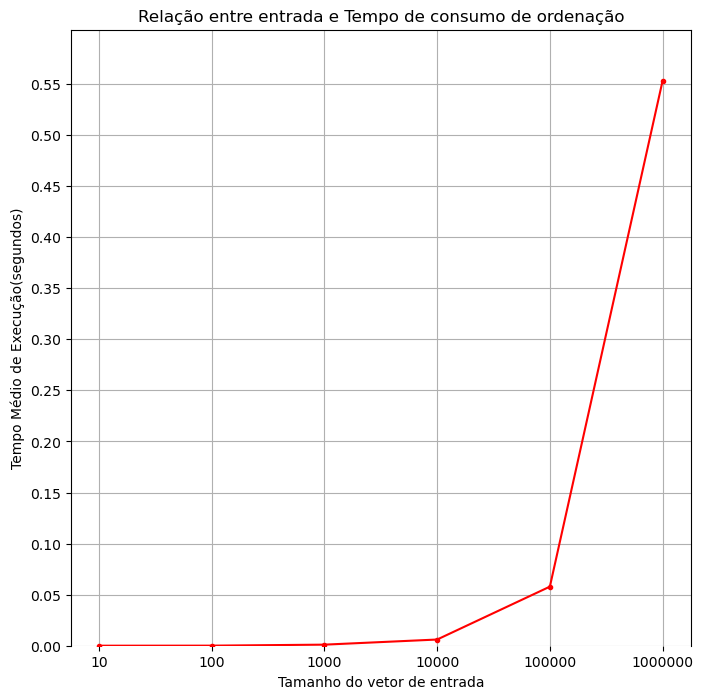

In [49]:
ARRAY_IS_OG = []
ARRAY_IS_OG.append(2.3033333339602297e-05)
ARRAY_IS_OG.append(7.226666654484386e-05)
ARRAY_IS_OG.append(0.0010507666667460096)
ARRAY_IS_OG.append(0.00606506666660304)
ARRAY_IS_OG.append(0.05785583333348162)
ARRAY_IS_OG.append(0.553166399999706)

INTERVALO_PLOTAGEM = 0.05

constroiGrafico(ARRAY_PLOT_X,ARRAY_IS_OG,INTERVALO_PLOTAGEM)

### Cáculo do Tempo do InsertionSort - Array de elementos inversamente ordenados


In [31]:
# Chamada para o insertionSort com 10 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_1, aux_generate="inverse_order_generate")

Algoritmos: insertionSort. Tempos de execução: [4.3200000163778896e-05, 3.6699999782285886e-05, 3.440000000409782e-05]. Média das execuções: 3.8099999983387534e-05


3.8099999983387534e-05

In [32]:
# Chamada para o insertionSort com 100 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_2, aux_generate="inverse_order_generate")

Algoritmos: insertionSort. Tempos de execução: [0.0019383999997444334, 0.0014658000000054017, 0.0009107999999287131]. Média das execuções: 0.0014383333332261827


0.0014383333332261827

In [33]:
# Chamada para o insertionSort com 1000 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_3, aux_generate="inverse_order_generate")

Algoritmos: insertionSort. Tempos de execução: [0.08035169999993741, 0.07593679999990854, 0.07647369999995135]. Média das execuções: 0.07758739999993243


0.07758739999993243

In [34]:
# Chamada para o insertionSort com 10000 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_4, aux_generate="inverse_order_generate")

Algoritmos: insertionSort. Tempos de execução: [7.902257000000191, 8.261224599999878, 8.188273299999764]. Média das execuções: 8.117251633333277


8.117251633333277

In [ ]:
# Chamada para o insertionSort com 100000 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_5, aux_generate="inverse_order_generate")

Algoritmos: insertionSort. Estimativa de tempo de execução: 2985.077 segundos

In [ ]:
# Chamada para o insertionSort com 1000000 elementos 
run_sorting_algorithm(algorithm="insertionSort", n=ARRAY_LENGTH_6, aux_generate="inverse_order_generate")

Algoritmos: insertionSort. Estimativa de tempo de execução: 298507.7 segundos

### Plotagem do gráfico do InsertionSort - Array de elementos inversamente ordenados


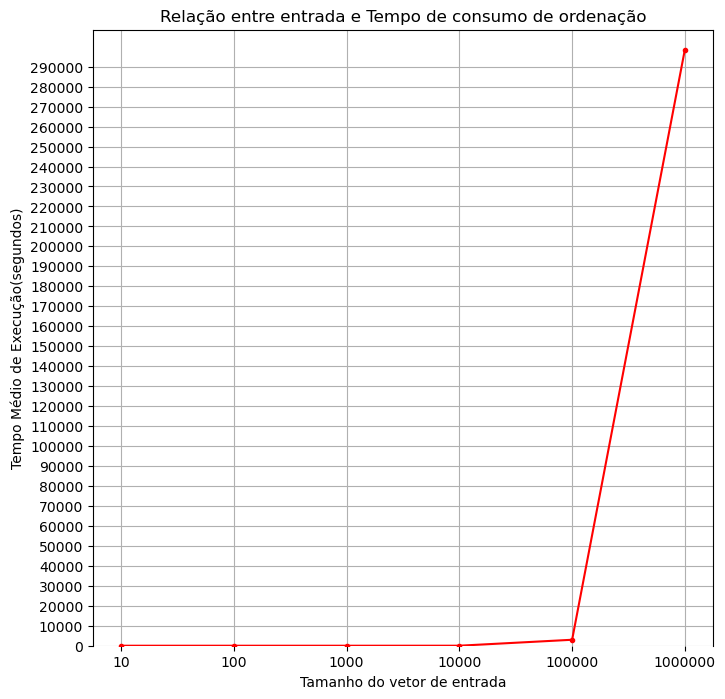

In [50]:
ARRAY_IS_IG = []
ARRAY_IS_IG.append(3.8099999983387534e-05)
ARRAY_IS_IG.append(0.0014383333332261827)
ARRAY_IS_IG.append(0.07758739999993243)
ARRAY_IS_IG.append(8.117251633333277)
ARRAY_IS_IG.append(2985.077)
ARRAY_IS_IG.append(298507.7)

INTERVALO_PLOTAGEM = 10000

constroiGrafico(ARRAY_PLOT_X,ARRAY_IS_IG,INTERVALO_PLOTAGEM)

### Plotagem comparativa dos Gráficos - InsertionSort

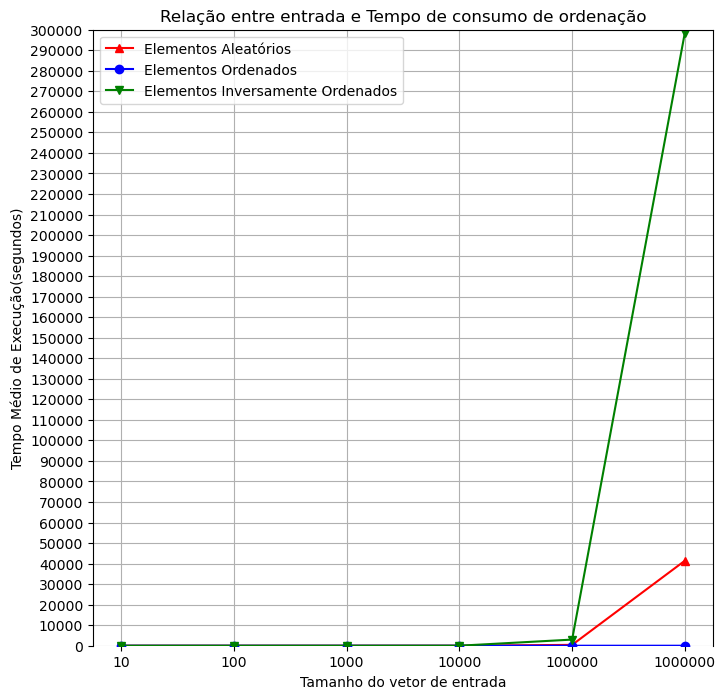

In [293]:
INTERVALO_PLOTAGEM = 10000
constroiGraficoCompara(ARRAY_IS_RG,ARRAY_IS_OG,ARRAY_IS_IG, INTERVALO_PLOTAGEM)

## Comparação do tempo de execução

Dados os testes executados em diferentes entradas, o seguinte gráfico é uma ferramenta para comparar os tempos de execução em funçãodo tamanho e o tipo de entrada (vetor ordenado, inversamente ordenado ou aleatoriamente gerado) 

### Entradas aleatoriamente geradas

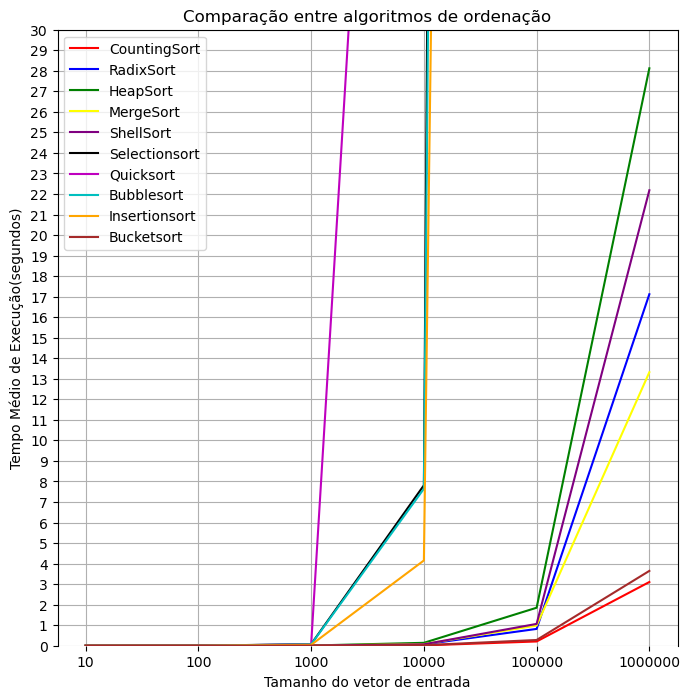

In [51]:
    # definir os eixos x e y
    x = [10,100,1000,10000,100000,1000000]
    
    y1 = ARRAY_CS_RG # countingsort
    y2 = ARRAY_RS_RG # radixsort
    y3 = ARRAY_HS_RG # heapsort
    y4 = ARRAY_MS_RG # mergesort
    y5 = ARRAY_SS_RG # shellsort
    y6 = ARRAY_SE_RG # selectionsort 
    y7 = ARRAY_QS_RG # quicksort
    y8 = ARRAY_BS_RG # bubblesort 
    y9 = ARRAY_IS_RG # insertionsort 
    y10= ARRAY_BU_RG # bucketsort  
     
    fig, ax = plt.subplots(figsize=(8,8))
    
    # legendas e apresentação
    plt.xlabel('Tamanho do vetor de entrada')
    plt.ylabel('Tempo Médio de Execução(segundos)') 
    plt.title('Comparação entre algoritmos de ordenação')
    ax.spines['bottom'].set_visible(False)
    ax.grid(True) 
    
    #definir limites do gráfico de comparação
    maior = 30
    menor = 0
    intervalo = 1
    
    #x
    xi = list(range(len(x)))
    plt.xticks(xi, x)
    
    #y
    ax.set_ylim(menor, maior)
    ax.set_yticks(np.arange(menor,maior+intervalo, intervalo))
    
    #plotar y1 : CountingSort
    plt.plot(xi, y1, linestyle='-', color='r', label='CountingSort')
    
    #plotar y2 : RadixSort
    plt.plot(xi, y2, linestyle='-', color='b', label='RadixSort')
    
    #plotar y3 : HeapSort
    plt.plot(xi, y3, linestyle='-', color='g', label='HeapSort')
    
    #plotar y4 : MergeSort
    plt.plot(xi, y4, linestyle='-', color='yellow', label='MergeSort')
    
    #plotar y5 : ShellSort
    plt.plot(xi, y5, linestyle='-', color='purple', label='ShellSort')
    
    #plotar y6 : Selectionsort
    plt.plot(xi, y6, linestyle='-', color='black', label='Selectionsort')
    
    #plotar y7 : Quicksort
    plt.plot(xi, y7, linestyle='-', color='m', label='Quicksort')
    
    #plotar y8 : Bubblesort
    plt.plot(xi, y8, linestyle='-', color='c', label='Bubblesort')
    
    #plotar y9 : Insertionsort
    plt.plot(xi, y9, linestyle='-', color='orange', label='Insertionsort')
    
    #plotar y10 : Bucketsort
    plt.plot(xi, y10, linestyle='-', color='brown', label='Bucketsort')
    
    plt.legend(['CountingSort','RadixSort','HeapSort','MergeSort','ShellSort','Selectionsort','Quicksort','Bubblesort','Insertionsort','Bucketsort'])
    plt.show()

### Entradas ordenadas

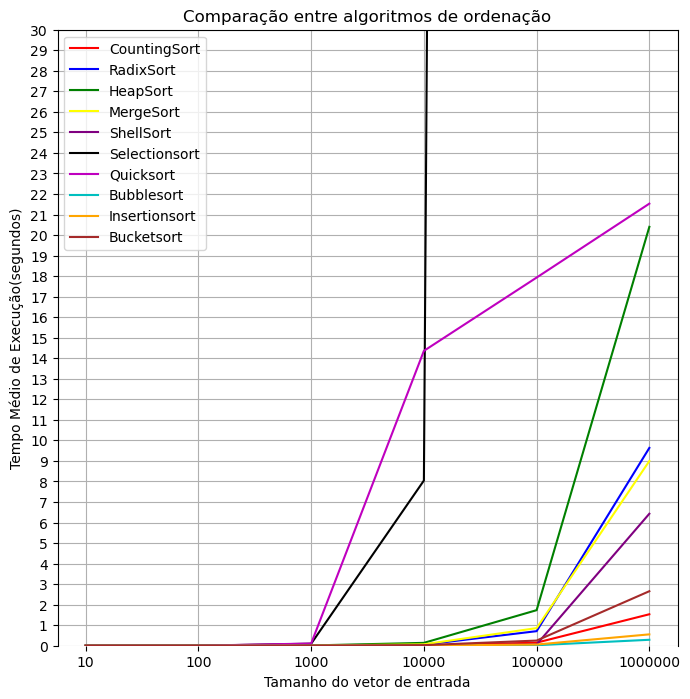

In [52]:
    # definir os eixos x e y
    x = [10,100,1000,10000,100000,1000000]
    
    y1 = ARRAY_CS_OG # countingsort
    y2 = ARRAY_RS_OG # radixsort
    y3 = ARRAY_HS_OG # heapsort
    y4 = ARRAY_MS_OG # mergesort
    y5 = ARRAY_SS_OG # shellsort
    y6 = ARRAY_SE_OG # selectionsort 
    y7 = ARRAY_QS_OG # quicksort 
    y8 = ARRAY_BS_OG # bubblesort 
    y9 = ARRAY_IS_OG # insertionsort 
    y10= ARRAY_BU_OG # bucketsort 
     
    fig, ax = plt.subplots(figsize=(8,8))
    
    # legendas e apresentação
    plt.xlabel('Tamanho do vetor de entrada')
    plt.ylabel('Tempo Médio de Execução(segundos)') 
    plt.title('Comparação entre algoritmos de ordenação')
    ax.spines['bottom'].set_visible(False)
    ax.grid(True) 
    
    #definir limites do gráfico de comparação
    maior = 30
    menor = 0
    intervalo = 1
    
    #x
    xi = list(range(len(x)))
    plt.xticks(xi, x)
    
    #y
    ax.set_ylim(menor, maior)
    ax.set_yticks(np.arange(menor,maior+intervalo, intervalo))
    
    #plotar y1 : CountingSort
    plt.plot(xi, y1, linestyle='-', color='r', label='CountingSort')
    
    #plotar y2 : RadixSort
    plt.plot(xi, y2, linestyle='-', color='b', label='RadixSort')
    
    #plotar y3 : HeapSort
    plt.plot(xi, y3, linestyle='-', color='g', label='HeapSort')
    
    #plotar y4 : MergeSort
    plt.plot(xi, y4, linestyle='-', color='yellow', label='MergeSort')
    
    #plotar y5 : ShellSort
    plt.plot(xi, y5, linestyle='-', color='purple', label='ShellSort')
    
    #plotar y6 : Selectionsort
    plt.plot(xi, y6, linestyle='-', color='black', label='Selectionsort')
    
    #plotar y7 : Quicksort
    plt.plot(xi, y7, linestyle='-', color='m', label='Quicksort')
    
    #plotar y8 : Bubblesort
    plt.plot(xi, y8, linestyle='-', color='c', label='Bubblesort')
    
    #plotar y9 : Insertionsort
    plt.plot(xi, y9, linestyle='-', color='orange', label='Insertionsort')
    
    #plotar y10 : Bucketsort
    plt.plot(xi, y10, linestyle='-', color='brown', label='Bucketsort')
    
    plt.legend(['CountingSort','RadixSort','HeapSort','MergeSort','ShellSort','Selectionsort','Quicksort','Bubblesort','Insertionsort','Bucketsort'])
    plt.show()

### Entradas inversamente ordenadas

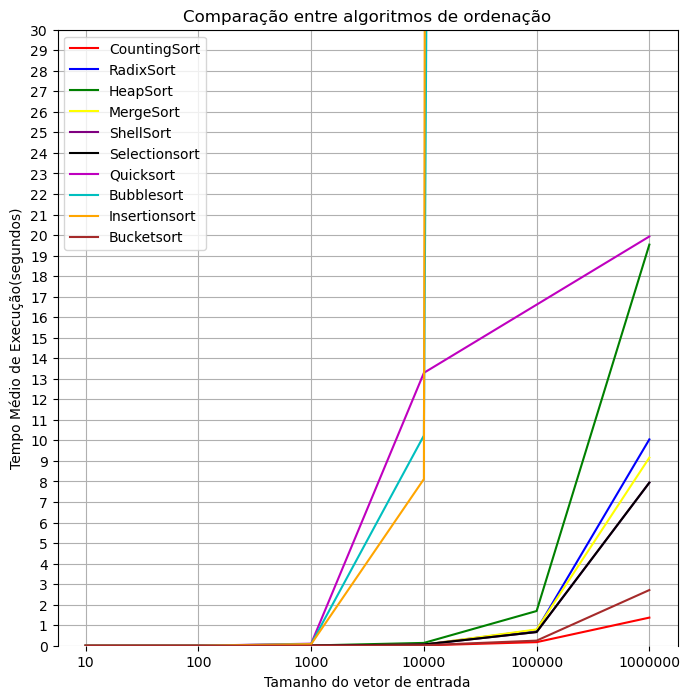

In [53]:
    # definir os eixos x e y
    x = [10,100,1000,10000,100000,1000000]
    
    y1 = ARRAY_CS_IG # countingsort
    y2 = ARRAY_RS_IG # radixsort
    y3 = ARRAY_HS_IG # heapsort
    y4 = ARRAY_MS_IG # mergesort
    y5 = ARRAY_SS_IG # shellsort
    y6 = ARRAY_SE_IG # selectionsort 
    y7 = ARRAY_QS_IG # quicksort
    y8 = ARRAY_BS_IG # bubblesort 
    y9 = ARRAY_IS_IG # insertionsort 
    y10= ARRAY_BU_IG # bucketsort 
     
    fig, ax = plt.subplots(figsize=(8,8))
    
    # legendas e apresentação
    plt.xlabel('Tamanho do vetor de entrada')
    plt.ylabel('Tempo Médio de Execução(segundos)') 
    plt.title('Comparação entre algoritmos de ordenação')
    ax.spines['bottom'].set_visible(False)
    ax.grid(True) 
    
    #definir limites do gráfico de comparação
    maior = 30
    menor = 0
    intervalo = 1
    
    #x
    xi = list(range(len(x)))
    plt.xticks(xi, x)
    
    #y
    ax.set_ylim(menor, maior)
    ax.set_yticks(np.arange(menor,maior+intervalo, intervalo))
    
    #plotar y1 : CountingSort
    plt.plot(xi, y1, linestyle='-', color='r', label='CountingSort')
    
    #plotar y2 : RadixSort
    plt.plot(xi, y2, linestyle='-', color='b', label='RadixSort')
    
    #plotar y3 : HeapSort
    plt.plot(xi, y3, linestyle='-', color='g', label='HeapSort')
    
    #plotar y4 : MergeSort
    plt.plot(xi, y4, linestyle='-', color='yellow', label='MergeSort')
    
    #plotar y5 : ShellSort
    plt.plot(xi, y5, linestyle='-', color='purple', label='ShellSort')
    
    #plotar y6 : Selectionsort
    plt.plot(xi, y5, linestyle='-', color='black', label='Selectionsort')
    
    #plotar y7 : Quicksort
    plt.plot(xi, y7, linestyle='-', color='m', label='Quicksort')

    #plotar y8 : Bubblesort
    plt.plot(xi, y8, linestyle='-', color='c', label='Bubblesort')
    
    #plotar y9 : Insertionsort
    plt.plot(xi, y9, linestyle='-', color='orange', label='Insertionsort')
    
    #plotar y10 : Bucketsort
    plt.plot(xi, y10, linestyle='-', color='brown', label='Bucketsort')
    
    plt.legend(['CountingSort','RadixSort','HeapSort','MergeSort','ShellSort','Selectionsort','Quicksort','Bubblesort','Insertionsort','Bucketsort'])
    plt.show()